# Project 5: Travel Package Purchase Prediction for "Visit with Us"
Student : Cameron Presley

Version : 2021.04.26

email : cameron@ignitedzen.net

Dataset Filename : Tourism.xlsx

# Background and Context

The Policy Maker of "Visit with Us" tourism company wants to enable and establish a viable business model to expand the customer base.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.


# Objective


1.  Analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team to improve the yield from the next marketing campaign while improving the costs.

2.  Build a model to predict the potential customer who is going to purchase the newly introduced travel package for Wellness Tourism.
 

# Data Dictionary

Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Product taken flag
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisited: Total number of person came with customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of the trip in a year by customer
* Passport: The customer has passport or not
* OwnCar: Customers owns a car flag
* NumberOfChildrenVisited: Total number of children visit with customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer


Customer interaction data: 

* PitchSatisfactionScore: Sales pitch satisfactory score
* ProductPitched: Product pitched by a salesperson
* NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
* DurationOfPitch: Duration of the pitch by a salesman to customer

# Outline, Actions, and Key Deliverables


- <a href = #link1>1.  Exploratory Data Analysis </a>

    - Univariate analysis
    - Bivariate analysis
    - Multivariate analysis

- <a href = #link2>2.  Insights based on EDA </a>

- <a href = #link3>3.  Data Pre-processing </a>

    - Prepare the data for analysis 
    - Missing value Treatment, Outlier Detection/Treatment, Feature Engineering, Data Prep, Model Split


- <a href = #link4>4.  Model building & 5. Tuning </a>
 
 * Bagging
 
    - Decision Tree
    - Bagging Classifier (w/ and w/o weights)
    - Random Forest (w/ and w/o weights)
   
* Boosting

    - AdaBoost
    - Gradient Boosting
    - XGBoost
    - Stacking

- <a href = #link6>6.  Model performance evaluation </a>

- <a href = #link7>7.  Actionable Insights & Recommendations </a>








In [1]:
# In standard Markdown, place an anchor <a name="abcd"></a> 
#where you want to link to and refer to it on the same page by [link text](#abcd)

# Build header + import necessary libraries : numpy, pandas, seaborn, matplotlib.pyplot, etc., read in the dataset, set some styling

In [2]:
#Build a basic program header

student = 'Cameron Presley'
version = '2021.04.26'
email = 'cameron@ignitedzen.net'
title =  'Project 5:  Travel Package Purchase Prediction'
dataset_filename = 'Tourism.xlsx'

print ('Project Title :', title)
print ('')
print ('Student :', student)
print ('')
print ('Version :', version)
print ('')
print ('email :', email)
print ('')
print ('Dataset Filename :', dataset_filename)
print ('')


#Import the neccesary libraries and avoid warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np #working with arrays and applying linear algebra
import pandas as pd #needed for data analysis and dealing with data sets in general
import xlrd #library needed to read .xlsx files

import matplotlib.pyplot as plt #data viz
import seaborn as sns #data viz
import scipy.stats as stats #needed for statistical anlaysis
import statsmodels.api as sm #needed for building a contingency table from a Dataframe
from statsmodels.stats.proportion import proportions_ztest # for proportion Z test
from statsmodels.formula.api import ols # for ANOVA
from statsmodels.stats.anova import anova_lm # for ANOVA
from scipy.stats import chi2_contingency # for CHI SQUARE
from scipy.stats import ttest_rel #paired T-test
from scipy.stats import levene #Levene's test
import math #needed for some math functions such as sqrt
from sklearn.preprocessing import OneHotEncoder #load in case I need to one-hot encoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier

from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

import missingno as mi

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

#use seaborn styling - white grid

sns.set_style("whitegrid")


#Load Customer Data and check the basic struture ( the shape - rows + columns)

data = pd.read_excel('Tourism.xlsx', sheet_name = 'Tourism')
data_dict = pd.read_excel('Tourism.xlsx', sheet_name = 'Data Dict')

# we should always protect the original data, so assigning the data to another variable to prevent changes to the original data set


df = data.copy()
dd = data_dict.copy()

#Determine the basic shape of the data - # of rows and # of cols

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

row_num = df.shape[0]
print ('row_num =', row_num)




Project Title : Project 5:  Travel Package Purchase Prediction

Student : Cameron Presley

Version : 2021.04.26

email : cameron@ignitedzen.net

Dataset Filename : Tourism.xlsx

There are 4888 rows and 20 columns.
row_num = 4888


In [3]:
# bulding a fucntion to truncate numbers later when printing results

def truncate(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

# Initial Data Review

In [4]:
#open up view of columns and increase view of row data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

#set a seed value to get the same results with each random sampling of the table

np.random.seed(20)
df.sample(n=15)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
687,200687,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3,3.0,Basic,3.0,Single,5.0,0,5,1,0.0,Executive,17519.0
406,200406,0,52.0,Self Enquiry,1,9.0,Small Business,Male,2,4.0,Standard,3.0,Divorced,3.0,1,2,0,0.0,Senior Manager,22969.0
2173,202173,0,38.0,Company Invited,3,16.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,2.0,1,3,1,0.0,Manager,20666.0
3480,203480,1,32.0,Company Invited,1,9.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,8.0,1,3,1,2.0,Executive,22400.0
4824,204824,1,24.0,Company Invited,3,8.0,Salaried,Female,3,4.0,Basic,4.0,Single,3.0,1,5,1,2.0,Executive,19901.0
3052,203052,1,56.0,Self Enquiry,3,9.0,Small Business,Male,3,4.0,Deluxe,3.0,Unmarried,6.0,0,2,0,2.0,Manager,23838.0
288,200288,1,26.0,Self Enquiry,1,22.0,Small Business,Male,2,3.0,Basic,4.0,Married,3.0,1,2,1,1.0,Executive,17373.0
2478,202478,1,25.0,Self Enquiry,1,7.0,Small Business,Male,4,4.0,Basic,3.0,Divorced,4.0,1,3,1,3.0,Executive,20971.0
2030,202030,0,34.0,Self Enquiry,1,14.0,Salaried,Female,2,3.0,Deluxe,5.0,Married,4.0,0,5,1,1.0,Manager,20121.0
3145,203145,0,54.0,Self Enquiry,3,9.0,Small Business,Male,3,4.0,Super Deluxe,3.0,Married,8.0,0,3,1,1.0,AVP,33530.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [7]:
#looking at categorical variables

df.describe(include = ['object']).T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


# initial insights

* There is missing data for multiple variables that we will have to treat. Specifically:  Age, TypeofContact, DurationOfPitch, NumberofFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, and MonthlyIncome

* Some of the missing values are numeric and string data types.  Need to develop a strategy to do missing value imputation after exploring the data further.

* Variables with Dtype = objects will be converted to category.  Specifically : TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus, Designation

* Other variables (e.g., PreferredPropertyStar, PitchSatisfactionScore, etc.) while numeric should be treated as Categories.  Will convert prior to model building.


# check for missing values

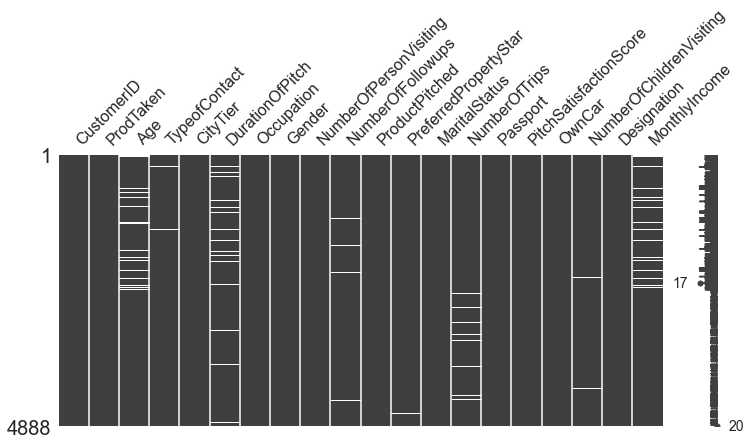

In [8]:
# Visualize the missing data spatially in the dataset

mi.matrix (df, figsize = (12,5));

In [9]:
# checking for counts for obviously missing value counts

df.isna().sum()



CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [10]:
# check  for the unique values
# each row for each column
n = df.nunique(axis=0)
  
print("No.of.unique values in each column :\n",
      n)

No.of.unique values in each column :
 CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64


## Convert Objects to Categories and List the Unique Values in Each Category

In [11]:
# redefinte object d-type to category
obj_cols = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
df[obj_cols] = df[obj_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

In [12]:
# step through each category value and list the unique values in each category

for i in obj_cols:
    print('*'*40)
    print('Unique values for',i, 'are :')
    print(df[i].value_counts())
    print('*'*40);

****************************************
Unique values for TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
****************************************
****************************************
Unique values for Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
****************************************
****************************************
Unique values for Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
****************************************
****************************************
Unique values for ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
****************************************
****************************************
Unique values for MaritalStatus are :
Married      2340
Divorced    

### first glance at the variable data distribution

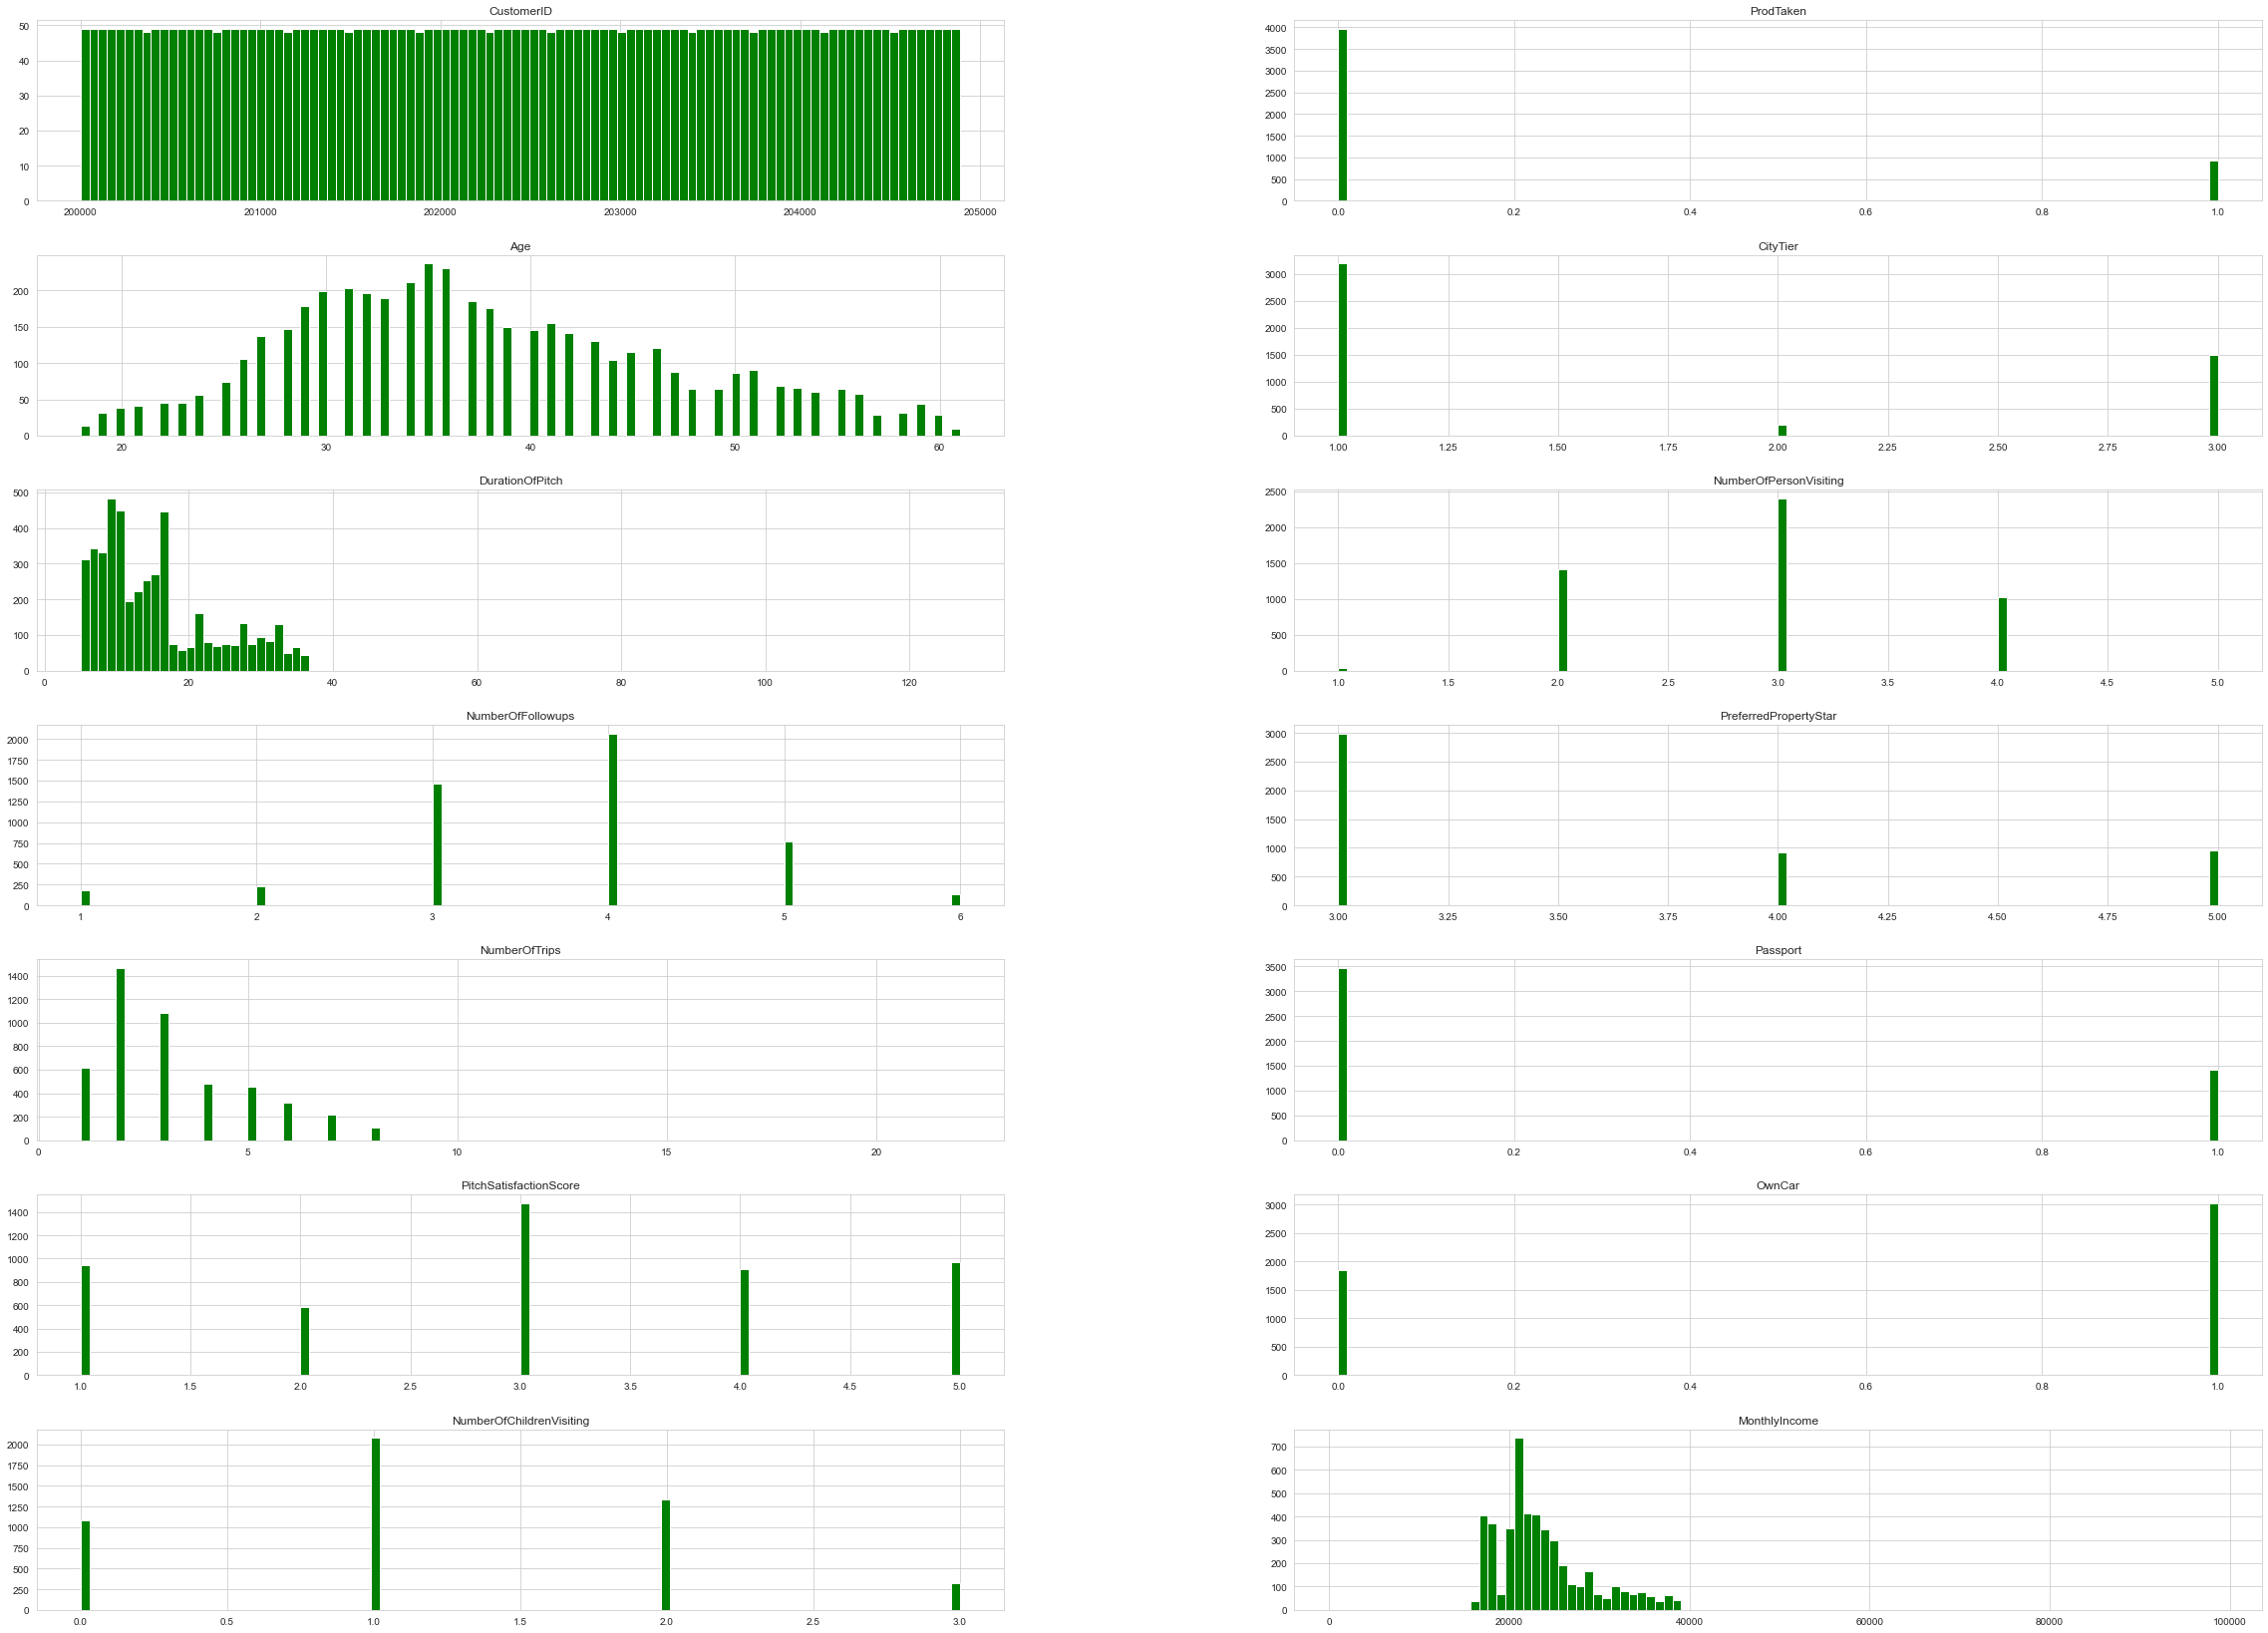

In [13]:
columns = list(df)[0:] #showing all columns
df[columns].hist(stacked=False, bins=100, figsize=(40,64), layout=(15,2), color = 'green'); 


# <a id = "link1"></a> 1.  EDA - UNIVARIATE & BIVARIATE & MULTIVARIATE ANALYSIS

## Function for Numerical Variable Analysis

In [14]:
def histogram_boxplot(feature, figsize=(10,5), bins = None):
   
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows -> subplot grid= 2
                                           sharex = True, # shared x-axis on both plots
                                           gridspec_kw = {"height_ratios": (.15, .85)}, 
                                           figsize = figsize 
                                           ) # build 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='hotpink') # boxplot will show the mean value
    sns.distplot(feature, kde=T, ax=ax_hist2, bins=bins,color = 'red') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='lime') # For histogram
    ax_hist2.axvline(np.mean(feature), color='red', linestyle='--') # Add mean to histogram to help with assessing skewness
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to histogram to help with assessing skewness

## Function for Categorical Variable Analysis

In [15]:

def bar_perc(plot, feature):
    
    total = len(feature) # count value for column
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # category percentage
        x = p.get_x() + p.get_width() / 2 - 0.05 # plot width
        y = p.get_y() + p.get_height()           # plot height
        ax.annotate(percentage, (x, y), size = 15) # label percentage value
    plt.show() # visualize plot
    


# EDA Univariate Analysis

# Numerical variables review

## CustomerID

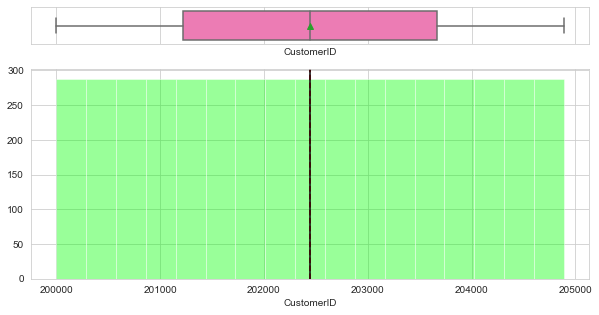

In [16]:
histogram_boxplot(df["CustomerID"])

In [17]:
miss_vals = df["CustomerID"].isnull().sum()
print ('*'*100)
print ('There are', df["CustomerID"].nunique(), 'unigue values:')
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)


****************************************************************************************************
There are 4888 unigue values:

obvious missing values to be treated 0
****************************************************************************************************


* keeping customer ID for now although it will most likely not add any value to EDA or model building; 

## ProdTaken [ target variable ]

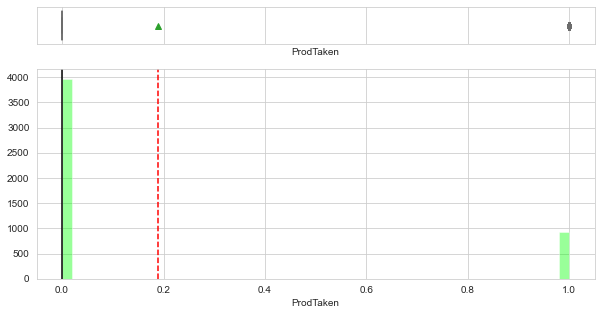

In [18]:
histogram_boxplot(df["ProdTaken"])

In [19]:
miss_vals = df["ProdTaken"].isnull().sum()
print ('There are', df["ProdTaken"].nunique(), 'unigue values:', df["ProdTaken"].unique())
n_true = df['ProdTaken'].isin(['1']).sum(axis=0)
n_false = df['ProdTaken'].isin(['0']).sum(axis=0)
print("Number of customers who purchased a package in the first campaign: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of customers who DID NOT purchase a package in the first campaign: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))
print ('*'*100)
print ('obvious missing values to be treated', miss_vals)

There are 2 unigue values: [1 0]
Number of customers who purchased a package in the first campaign: 920 (18.82%)
Number of customers who DID NOT purchase a package in the first campaign: 3968 (81.18%)
****************************************************************************************************
obvious missing values to be treated 0


* ProdTaken is our target variable for which we are going to building a model.

## Age

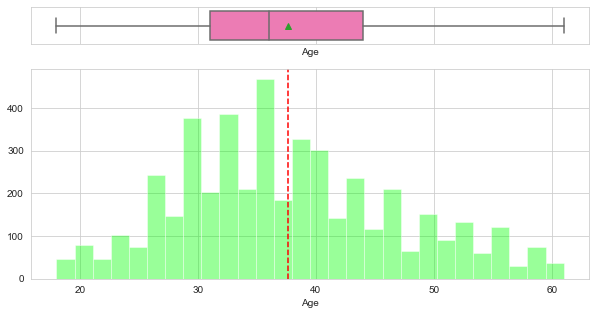

In [20]:
histogram_boxplot(df["Age"])

In [21]:
miss_vals = df["Age"].isnull().sum()
print ('*'*100)
print ('There are', df["Age"].nunique(), 'unigue values:')
print (df["Age"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Age'].describe().T

****************************************************************************************************
There are 44 unigue values:
[41. 49. 37. 33. nan 32. 59. 30. 38. 36. 35. 31. 34. 28. 29. 22. 53. 21.
 42. 44. 46. 39. 24. 43. 50. 27. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58.
 20. 25. 19. 57. 52. 47. 18. 60. 61.]

obvious missing values to be treated 226
****************************************************************************************************


count    4662.000000
mean       37.622265
std         9.316387
min        18.000000
25%        31.000000
50%        36.000000
75%        44.000000
max        61.000000
Name: Age, dtype: float64

* The mean age of customers is 37-38 years old.  The minimum age is 18, maximum age is 61, and 50% of the customers are between 31-44 years old.  The data is right skewed with no outliers.

## CityTier

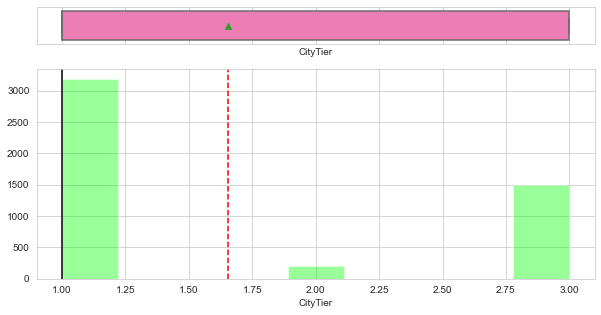

In [22]:
histogram_boxplot(df["CityTier"])

In [23]:
miss_vals = df["CityTier"].isnull().sum()
print ('*'*100)
print ('There are', df["CityTier"].nunique(), 'unigue values:')
print (df["CityTier"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['CityTier'].describe().T

****************************************************************************************************
There are 3 unigue values:
[3 1 2]

obvious missing values to be treated 0
****************************************************************************************************


count    4888.000000
mean        1.654255
std         0.916583
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         3.000000
Name: CityTier, dtype: float64

* There are no missing values.  Should treat CityTier as category.  Will convert to Category d-type and explore under Categorical variable review below.

* The predominance of customers live in Tier 1 cities, followed by Tier 3 and then Tier 2 respectively.

* Interestingly, customers in this date set come from the most developed cities and the least developed cities, with those cities in between representing the least number of customers in the data set. Not sure what this says about customers who purhcase Travel Packages through 'Vist with Us'.  Will explore correlation with Target variable.

In [24]:
df['CityTier']= df['CityTier'].astype ('category')
df['CityTier'].dtype

CategoricalDtype(categories=[1, 2, 3], ordered=False)

## DurationOfPitch

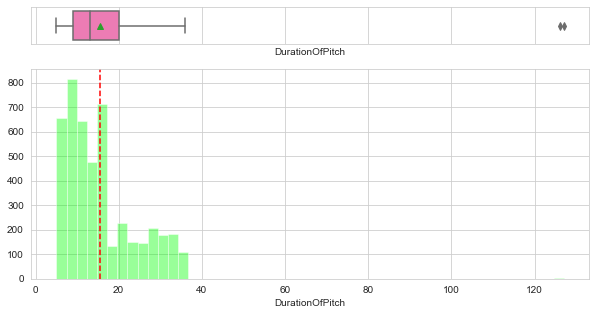

In [25]:
histogram_boxplot(df["DurationOfPitch"])

In [26]:
miss_vals = df["DurationOfPitch"].isnull().sum()
print ('*'*100)
print ('There are', df["DurationOfPitch"].nunique(), 'unigue values:')
print (df["DurationOfPitch"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['DurationOfPitch'].describe().T

****************************************************************************************************
There are 34 unigue values:
[  6.  14.   8.   9.  30.  29.  33.  22.  21.  32.  25.  27.  11.  17.
  15.  13.  12.  16.  10.  31.  18.  nan  24.  35.  28.  20.  26.  34.
  23.   5.  19. 126.   7.  36. 127.]

obvious missing values to be treated 251
****************************************************************************************************


count    4637.000000
mean       15.490835
std         8.519643
min         5.000000
25%         9.000000
50%        13.000000
75%        20.000000
max       127.000000
Name: DurationOfPitch, dtype: float64

* The mean time of a Sales Pitch for travel packages today is 15.5 minutes, with a minimum pitch of 5 minutes, and maximum of 2 hours and 7 min (a super long sales pitch).

* 50% of customers sit through a pitch lasting 9 minutes to 20 minutes.

* The data is right skewed with rhs outliers.


##  NumberOfPersonVisiting


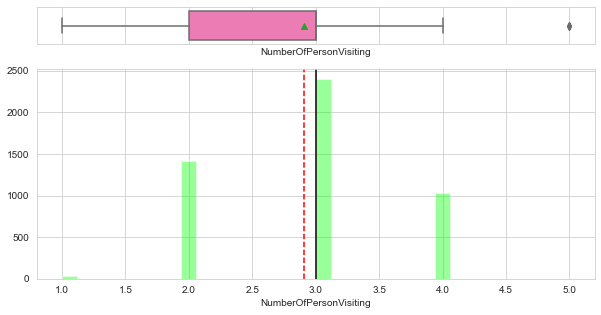

In [27]:
histogram_boxplot(df["NumberOfPersonVisiting"])

In [28]:
miss_vals = df["NumberOfPersonVisiting"].isnull().sum()
print ('*'*100)
print ('There are', df["NumberOfPersonVisiting"].nunique(), 'unigue values:')
print (df["NumberOfPersonVisiting"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['NumberOfPersonVisiting'].describe().T

****************************************************************************************************
There are 5 unigue values:
[3 2 1 4 5]

obvious missing values to be treated 0
****************************************************************************************************


count    4888.000000
mean        2.905074
std         0.724891
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: NumberOfPersonVisiting, dtype: float64

* Should treat as a category d-type. There are no missing values, ok to convert now.

*  When customers go on a trip, it ranges from 1 to 5 people.  The average number of people is about 3 people. The date is left skewed but does have rhs outliers.

In [29]:
df['NumberOfPersonVisiting']= df['NumberOfPersonVisiting'].astype ('category')
df['NumberOfPersonVisiting'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=False)

## NumberOfFollowups

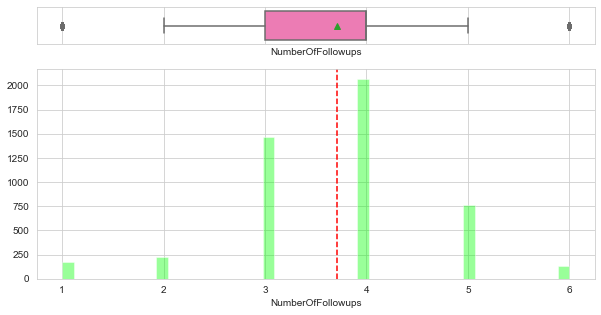

In [30]:
histogram_boxplot(df["NumberOfFollowups"])

In [31]:
miss_vals = df["NumberOfFollowups"].isnull().sum()
print ('*'*100)
print ('There are', df["NumberOfFollowups"].nunique(), 'unigue values:')
print (df["NumberOfFollowups"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['NumberOfFollowups'].describe().T

****************************************************************************************************
There are 6 unigue values:
[ 3.  4.  2.  5. nan  1.  6.]

obvious missing values to be treated 45
****************************************************************************************************


count    4843.000000
mean        3.708445
std         1.002509
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: NumberOfFollowups, dtype: float64

* Sales people follow up on average about 3.7 times after the sales pitch. There is at least 1 follow up and there is a maximum of 6 follow ups (or effectively, badgering the customers).

* Will address missing values before model building.

## PreferredPropertyStar


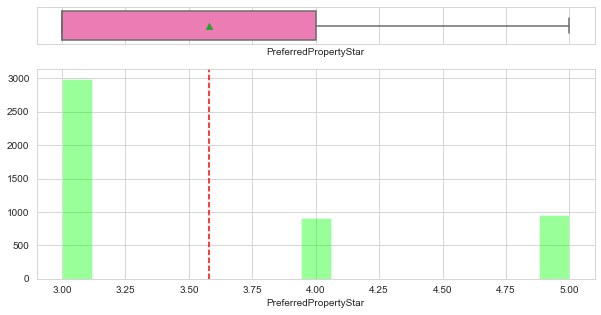

In [32]:
histogram_boxplot(df["PreferredPropertyStar"])

In [33]:
miss_vals = df["PreferredPropertyStar"].isnull().sum()
print ('*'*100)
print ('There are', df["PreferredPropertyStar"].nunique(), 'unigue values:')
print (df["PreferredPropertyStar"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)


****************************************************************************************************
There are 3 unigue values:
[ 3.  4.  5. nan]

obvious missing values to be treated 26
****************************************************************************************************


* Will convert to categorical, but will need to deal with missing values first. Will do this in the Missing values treatment and prior to model building.

* Visit with Us' customers prefer a hotel rating of least 3 stars followed by roughly an even split preferring between 4 and 5 stars.



## NumberOfTrips

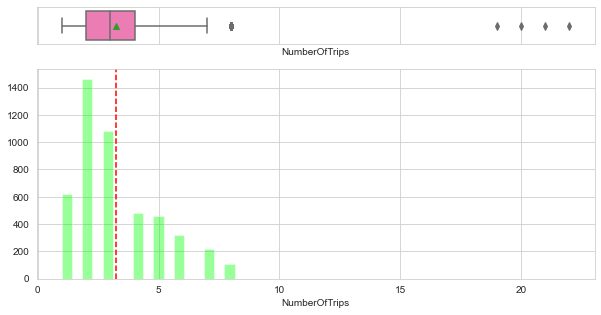

In [34]:
histogram_boxplot(df["NumberOfTrips"])

In [35]:
miss_vals = df["NumberOfTrips"].isnull().sum()
print ('*'*100)
print ('There are', df["NumberOfTrips"].nunique(), 'unigue values:')
print (df["NumberOfTrips"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['NumberOfTrips'].describe().T

****************************************************************************************************
There are 12 unigue values:
[ 1.  2.  7.  5.  6.  3.  4. 19. 21.  8. nan 20. 22.]

obvious missing values to be treated 140
****************************************************************************************************


count    4748.000000
mean        3.236521
std         1.849019
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        22.000000
Name: NumberOfTrips, dtype: float64

* Customers take 3.23 tripes per year on average.  Their minimum is 1 trip and maximum of 22.  50 % of customers take between 2 and 4 trips per year. 

* The data is right skewed with quite of few rhs outliers.

* There are 140 missing data points.

## Passport

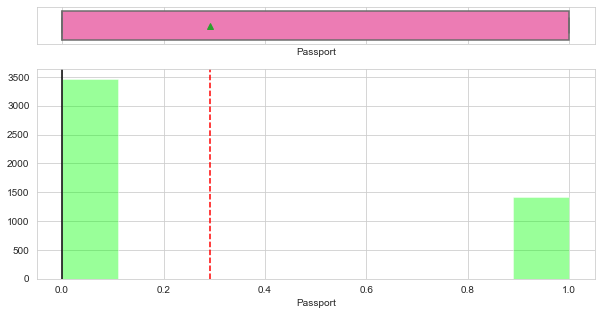

In [36]:
histogram_boxplot(df["Passport"])

In [37]:
miss_vals = df["Passport"].isnull().sum()
print ('*'*100)
print ('There are', df["Passport"].nunique(), 'unigue values:')
print (df["Passport"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)

****************************************************************************************************
There are 2 unigue values:
[1 0]

obvious missing values to be treated 0
****************************************************************************************************


* Will treat as a category.  The majority of customers do not have a passport, indicating that travel packages for these specific type of customers would need to be domestic travel packages. (> 2X more without than with Passports)


## PitchSatisfactionScore

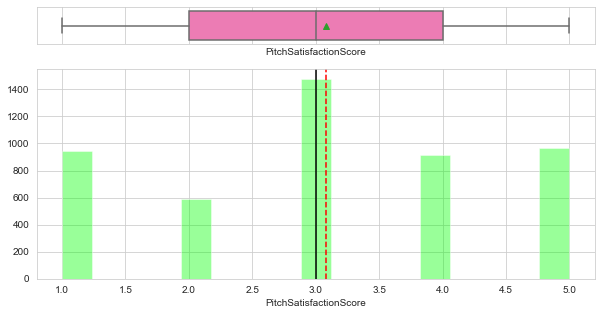

In [38]:
histogram_boxplot(df["PitchSatisfactionScore"])

In [39]:
miss_vals = df["PitchSatisfactionScore"].isnull().sum()
print ('*'*100)
print ('There are', df["PitchSatisfactionScore"].nunique(), 'unigue values:')
print (df["PitchSatisfactionScore"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)

****************************************************************************************************
There are 5 unigue values:
[2 3 5 4 1]

obvious missing values to be treated 0
****************************************************************************************************


* The most prevalent score on the sales pitch is 3 (middle score).  Those who rated the pitch, rated them very similarly above and below the middle score.  

* Should be treated as a category.  No missing values, will convert now.

In [40]:
df['PitchSatisfactionScore']= df['PitchSatisfactionScore'].astype ('category')
df['PitchSatisfactionScore'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=False)

## OwnCar

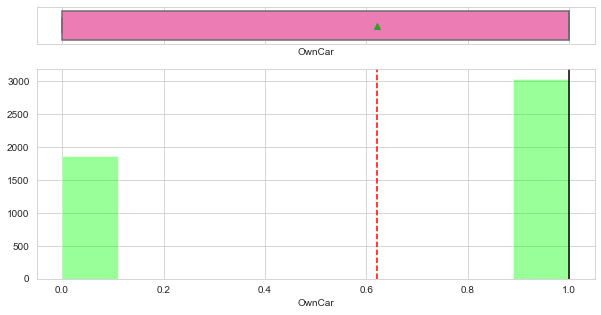

In [41]:
histogram_boxplot(df["OwnCar"])

In [42]:
miss_vals = df["OwnCar"].isnull().sum()
print ('*'*100)
print ('There are', df["OwnCar"].nunique(), 'unigue values:')
print (df["OwnCar"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)

****************************************************************************************************
There are 2 unigue values:
[1 0]

obvious missing values to be treated 0
****************************************************************************************************


* Customers are twice as likely to own a car as note.
* Convert to category date type no Missing values.


In [43]:
df['OwnCar']= df['OwnCar'].astype ('category')
df['OwnCar'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

## NumberOfChildrenVisiting

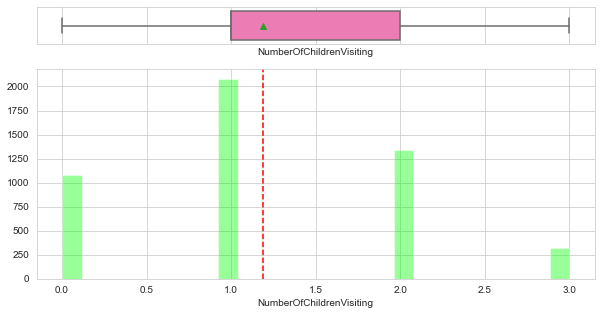

In [44]:
histogram_boxplot(df["NumberOfChildrenVisiting"])

In [45]:
miss_vals = df["NumberOfChildrenVisiting"].isnull().sum()
print ('*'*100)
print ('There are', df["NumberOfChildrenVisiting"].nunique(), 'unigue values:')
print (df["NumberOfChildrenVisiting"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)

****************************************************************************************************
There are 4 unigue values:
[ 0.  2.  1. nan  3.]

obvious missing values to be treated 66
****************************************************************************************************


* need to deal with missing values before model building.  May behave better as a category tha numeric time.

* The majority of the customers will tavel with children younger than 5 years old.

## MonthlyIncome

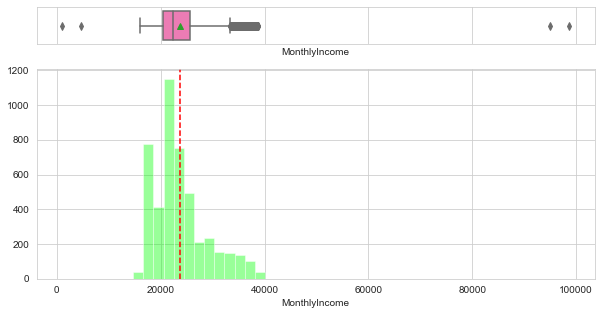

In [46]:
histogram_boxplot(df["MonthlyIncome"])

In [47]:
miss_vals = df["MonthlyIncome"].isnull().sum()
print ('*'*100)
print ('There are', df["MonthlyIncome"].nunique(), 'unigue values:')
print (df["MonthlyIncome"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['MonthlyIncome'].describe().T

****************************************************************************************************
There are 2475 unigue values:
[20993. 20130. 17090. ... 22097. 22995. 21471.]

obvious missing values to be treated 233
****************************************************************************************************


count     4655.000000
mean     23619.853491
std       5380.698361
min       1000.000000
25%      20346.000000
50%      22347.000000
75%      25571.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

* There are missing values around income which must be addressed before model building.

* Customers have on average a Gross Monthly Income of 23,619.85 USD, or 283,438 USD pa. The minimum is 1000 USD per month.  The max is 98,678 USD per month with 50% of customers having between 20,346 USD and 25,571 USD per month.  This seems really high and probably reflects gross monthly income for the entire household.

* Will plot City Tier vs. MonthlyIncome to see if the data makes sense.  More developed cities should have higher incomes.  There are outliers on the lhs and rhs suggesting potential defects in the data.  For example, on the rhs, did the customer enter gross annual income instead of gross monthly income.  Will need to deal with outliers before model building. The data is right skewed.



# Categorical variables review

## TypeofContact

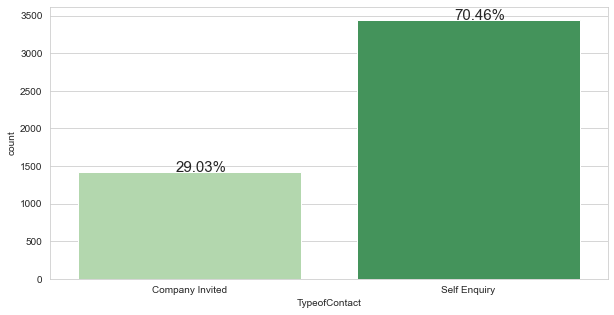

In [48]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['TypeofContact'], palette = 'Greens')
bar_perc (ax,df['TypeofContact'])

In [49]:
col_count = len(df['TypeofContact'])
perc_col_unique = ((df['TypeofContact'].value_counts())/col_count)*100
miss_vals = df['TypeofContact'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['TypeofContact'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64


Percentage category split (%):
Self Enquiry       70.458265
Company Invited    29.030278
Name: TypeofContact, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 25
Percentage missing values: 0.5114566284779051


* Most customers come to Visit with Us by through Self Inquiry.  70% vs. ~ 30%.  This suggests that Visit with Us has work to do in the form outreach and demand generation.  Relying on self-enquiry is based on luck and is not a strategy for growth.  It could not also suggest they need to improve their data attribution for customer contact and understand how customers came to learn about Visit with Us. 

## Occupation

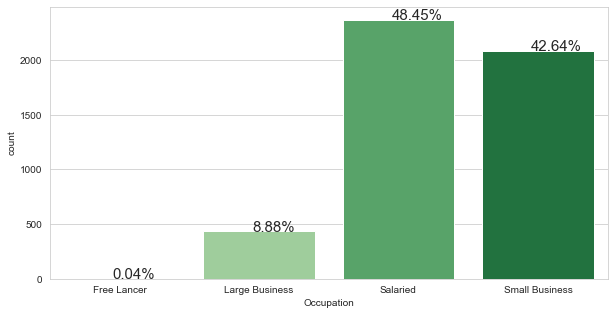

In [50]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Occupation'], palette = 'Greens')
bar_perc (ax,df['Occupation'])

In [51]:
col_count = len(df['Occupation'])
perc_col_unique = ((df['Occupation'].value_counts())/col_count)*100
miss_vals = df['Occupation'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['Occupation'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64


Percentage category split (%):
Salaried          48.445172
Small Business    42.635025
Large Business     8.878887
Free Lancer        0.040917
Name: Occupation, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


*  There are no missing values. About ~48.5% of the customers work in a salaried job.  ~42.5% have a small business. ~9% of customers own a large business.  A very, very smal % of customers are Free Lancers. Perhaps the latter represent the lhs outliers we saw in MonthlyIncome.

* Explore Occupation vs. Monthly Income.

## Gender

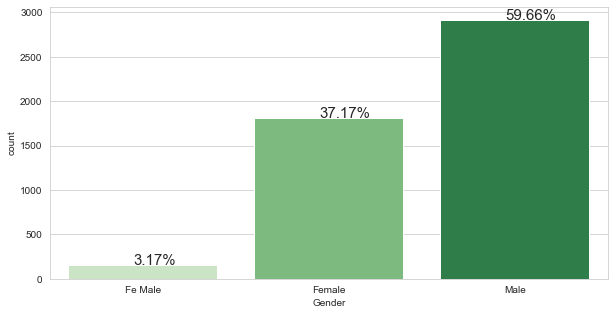

In [52]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Gender'], palette = 'Greens')
bar_perc (ax,df['Gender'])

In [53]:
col_count = len(df['Gender'])
perc_col_unique = ((df['Gender'].value_counts())/col_count)*100
miss_vals = df['Gender'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['Gender'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64


Percentage category split (%):
Male       59.656301
Female     37.172668
Fe Male     3.171031
Name: Gender, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


* There are data defects Fe Male, should be Female.

* ~60% of customers are Male, 40% Female.

## ProductPitched

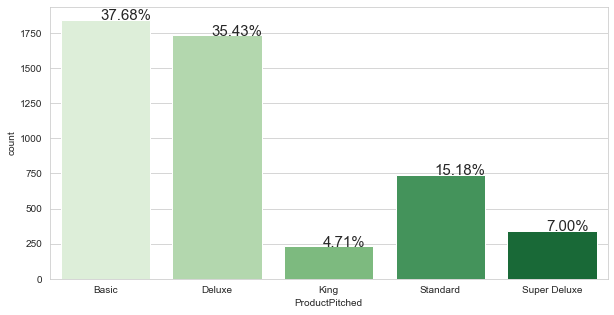

In [54]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['ProductPitched'], palette = 'Greens')
bar_perc (ax,df['ProductPitched'])

In [55]:
col_count = len(df['ProductPitched'])
perc_col_unique = ((df['ProductPitched'].value_counts())/col_count)*100
miss_vals = df['ProductPitched'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['ProductPitched'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64


Percentage category split (%):
Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: ProductPitched, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


* The data dictionary offers little detail around these packages to help distinguish what is included, or the order of value based on description.  We can infer that Basic is the lowest tier and Super Deluxe is the highest.  It is also hard to distinguish if Basic and Standard are equivalent and should be combined. For now, I am assuming they are distinct and an opportunity for improvement in marketing.  There are so many cateogories, it is potentially confusing for customers.  There is no data to support this position yet, only anecdotal experience.

* Over half the customers (~53%) are pitched Basic/Standard packages.  35% of customers received a pitch for Deluxe packages.  ~12% of customers received a pitch for King and Super Deluxe.

* There is no missing data to treat.

## MaritalStatus

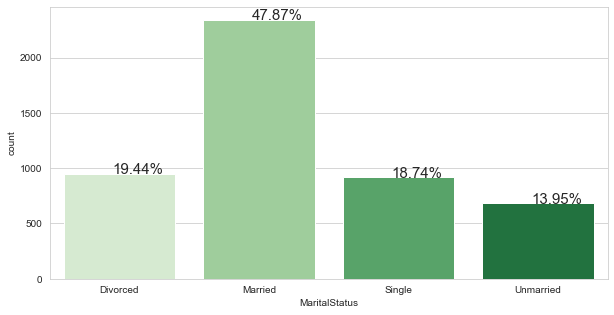

In [56]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['MaritalStatus'], palette = 'Greens')
bar_perc (ax,df['MaritalStatus'])

In [57]:
col_count = len(df['MaritalStatus'])
perc_col_unique = ((df['MaritalStatus'].value_counts())/col_count)*100
miss_vals = df['MaritalStatus'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['MaritalStatus'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64


Percentage category split (%):
Married      47.872340
Divorced     19.435352
Single       18.739771
Unmarried    13.952537
Name: MaritalStatus, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


* The data is defective.  There are 3 categories equivalent to being single. (single, unmarried, and divorced).  will fix it before model building.

* ~48% of customers are married, 52% are single (or not married).

* No missing values to address.

## Designation

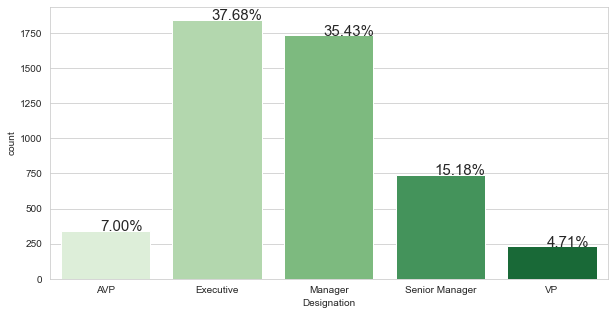

In [58]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Designation'], palette = 'Greens')
bar_perc (ax,df['Designation'])

In [59]:
col_count = len(df['Designation'])
perc_col_unique = ((df['Designation'].value_counts())/col_count)*100
miss_vals = df['Designation'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['Designation'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


Percentage category split (%):
Executive         37.684124
Manager           35.433715
Senior Manager    15.180033
AVP                6.996727
VP                 4.705401
Name: Designation, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


~35% of customers are Managers, ~15% are Sr. Managers, and the follow on 50% of Customers are some form of Executive (Executive, VP, AVP).  Will combine these before model building to help reduce dimensionality.

## CityTier

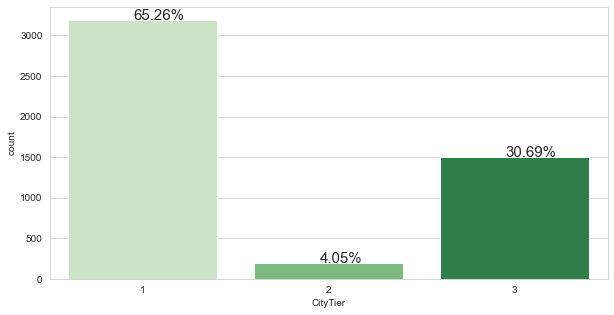

In [60]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['CityTier'], palette = 'Greens')
bar_perc (ax,df['CityTier'])

In [61]:
col_count = len(df['CityTier'])
perc_col_unique = ((df['CityTier'].value_counts())/col_count)*100
miss_vals = df['CityTier'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['CityTier'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
1    3190
3    1500
2     198
Name: CityTier, dtype: int64


Percentage category split (%):
1    65.261866
3    30.687398
2     4.050736
Name: CityTier, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


* No new information on CityTier from above. 

## Passport

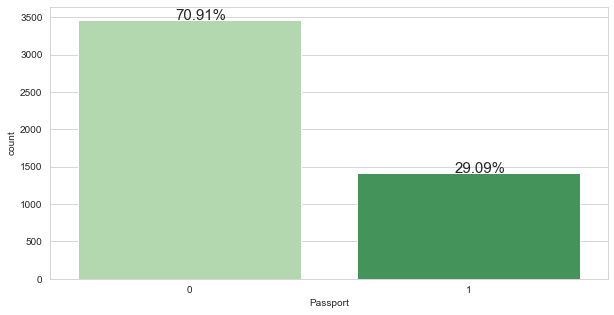

In [62]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Passport'], palette = 'Greens')
bar_perc (ax,df['Passport'])

In [63]:
col_count = len(df['Passport'])
perc_col_unique = ((df['Passport'].value_counts())/col_count)*100
miss_vals = df['Passport'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['Passport'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
0    3466
1    1422
Name: Passport, dtype: int64


Percentage category split (%):
0    70.908347
1    29.091653
Name: Passport, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


* ~ 71% of customers do not have a passport.

* Explore relationship between Occupation, MonthlyIncome, Age, Gender, and CityTier with having a Passport.  There are some potential insights there along with what this might tell us about the customer profile inclined to Domestic v. International travel.

# NumberOfPersonVisiting

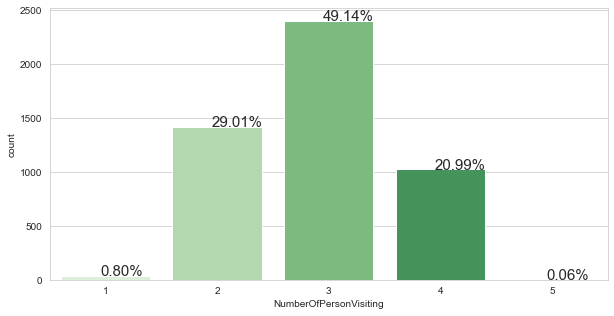

In [64]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['NumberOfPersonVisiting'], palette = 'Greens')
bar_perc (ax,df['NumberOfPersonVisiting'])

In [65]:
col_count = len(df['NumberOfPersonVisiting'])
perc_col_unique = ((df['NumberOfPersonVisiting'].value_counts())/col_count)*100
miss_vals = df['NumberOfPersonVisiting'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['NumberOfPersonVisiting'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64


Percentage category split (%):
3    49.140753
2    29.009820
4    20.990180
1     0.797872
5     0.061375
Name: NumberOfPersonVisiting, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


* No missing values to treat.

* ~49% of the customers will have at least 3 people on the trip. 29% will travel with 2 people.  ~21% will travel with 4 people

## PitchSatisfactionScore

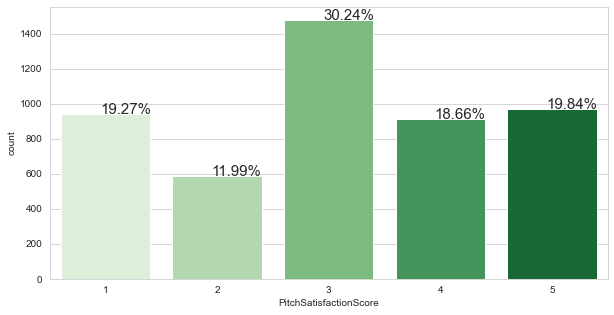

In [66]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['PitchSatisfactionScore'], palette = 'Greens')
bar_perc (ax,df['PitchSatisfactionScore'])

In [67]:
col_count = len(df['PitchSatisfactionScore'])
perc_col_unique = ((df['PitchSatisfactionScore'].value_counts())/col_count)*100
miss_vals = df['PitchSatisfactionScore'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['PitchSatisfactionScore'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
3    1478
5     970
1     942
4     912
2     586
Name: PitchSatisfactionScore, dtype: int64


Percentage category split (%):
3    30.237316
5    19.844517
1    19.271686
4    18.657938
2    11.988543
Name: PitchSatisfactionScore, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


* No missing data to be treated.

* 30% of sales pitches received a score of 3.  (the middle score between extremes = 1 to 5)

* ~ 69% of sales pitches were 3 or better.

* ~31 % of customers rated the sales pitches below 3.

* Roughly the same number of sales pitches (~19% to 20%) were a 1 (worst) or 5 (best). 40% of the sales pitch scores lives at the extremes and are evenly split.



## OwnCar

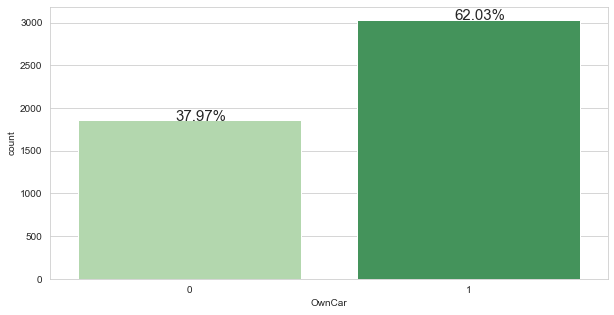

In [68]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['OwnCar'], palette = 'Greens')
bar_perc (ax,df['OwnCar'])

In [69]:
col_count = len(df['OwnCar'])
perc_col_unique = ((df['OwnCar'].value_counts())/col_count)*100
miss_vals = df['OwnCar'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['OwnCar'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
1    3032
0    1856
Name: OwnCar, dtype: int64


Percentage category split (%):
1    62.02946
0    37.97054
Name: OwnCar, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


* No missing data to treat. 63% of customers own a car.  


## PreferredPropertyStar

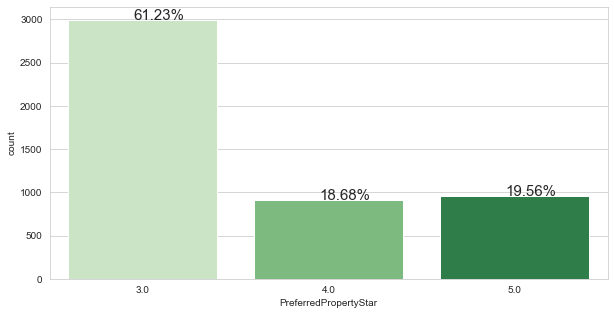

In [70]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['PreferredPropertyStar'], palette = 'Greens')
bar_perc (ax,df['PreferredPropertyStar'])

In [71]:
col_count = len(df['PreferredPropertyStar'])
perc_col_unique = ((df['PreferredPropertyStar'].value_counts())/col_count)*100
miss_vals = df['PreferredPropertyStar'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['PreferredPropertyStar'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64


Percentage category split (%):
3.0    61.231588
5.0    19.558101
4.0    18.678396
Name: PreferredPropertyStar, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 26
Percentage missing values: 0.5319148936170213


* There are missing values to treat before model building.

* ~62% of customers prefer a 3 start hotel, the balance are evenly split between 4 and 5 stars. 3  starts is the minimum hotel rating preferred.



## NumberOfFollowups

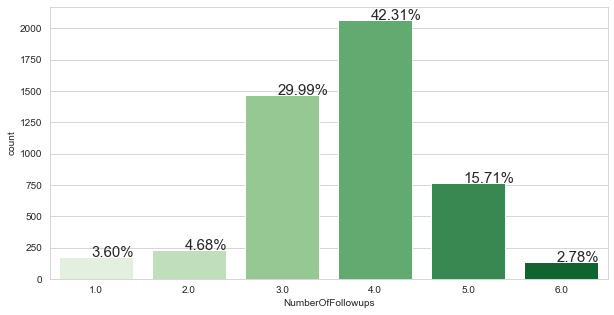

In [72]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['NumberOfFollowups'], palette = 'Greens')
bar_perc (ax,df['NumberOfFollowups'])

In [73]:
col_count = len(df['NumberOfFollowups'])
perc_col_unique = ((df['NumberOfFollowups'].value_counts())/col_count)*100
miss_vals = df['NumberOfFollowups'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['NumberOfFollowups'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64


Percentage category split (%):
4.0    42.307692
3.0    29.991817
5.0    15.711948
2.0     4.684943
1.0     3.600655
6.0     2.782324
Name: NumberOfFollowups, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 45
Percentage missing values: 0.9206219312602291


* Missing values to treat before model building.

* ~42% of sales people follow up 4 times.  ~16% - 5 times. ~3% - 6 times.  30% at least 3 times. About 3-5% only follow up 1-2 times, respectively.



## NumberOfChildrenVisiting

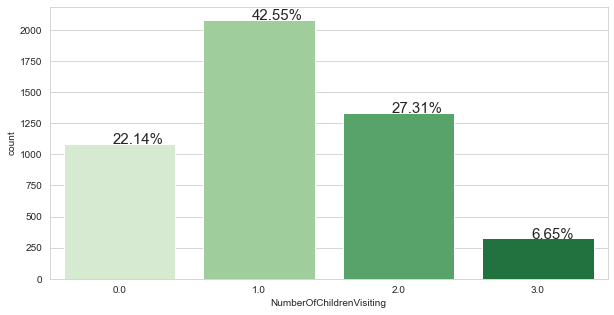

In [74]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['NumberOfChildrenVisiting'], palette = 'Greens')
bar_perc (ax,df['NumberOfChildrenVisiting'])

In [75]:
col_count = len(df['NumberOfChildrenVisiting'])
perc_col_unique = ((df['NumberOfChildrenVisiting'].value_counts())/col_count)*100
miss_vals = df['NumberOfChildrenVisiting'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['NumberOfChildrenVisiting'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
1.0    2080
2.0    1335
0.0    1082
3.0     325
Name: NumberOfChildrenVisiting, dtype: int64


Percentage category split (%):
1.0    42.553191
2.0    27.311784
0.0    22.135843
3.0     6.648936
Name: NumberOfChildrenVisiting, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 66
Percentage missing values: 1.3502454991816693


* Missing values to treat before model building.

* 22% of customers will not be taveling with children under the age of 5 years old.

* 42% will travel with at least 1.

* 27% will travel with at least 2.

* only ~6% will travel with at least 3.


* What does this tell me about Family Travel?



## Bi-Variate and Multi-Variate Analysis : exploring relationships of variables with ProdTaken

## Correlation Matrix

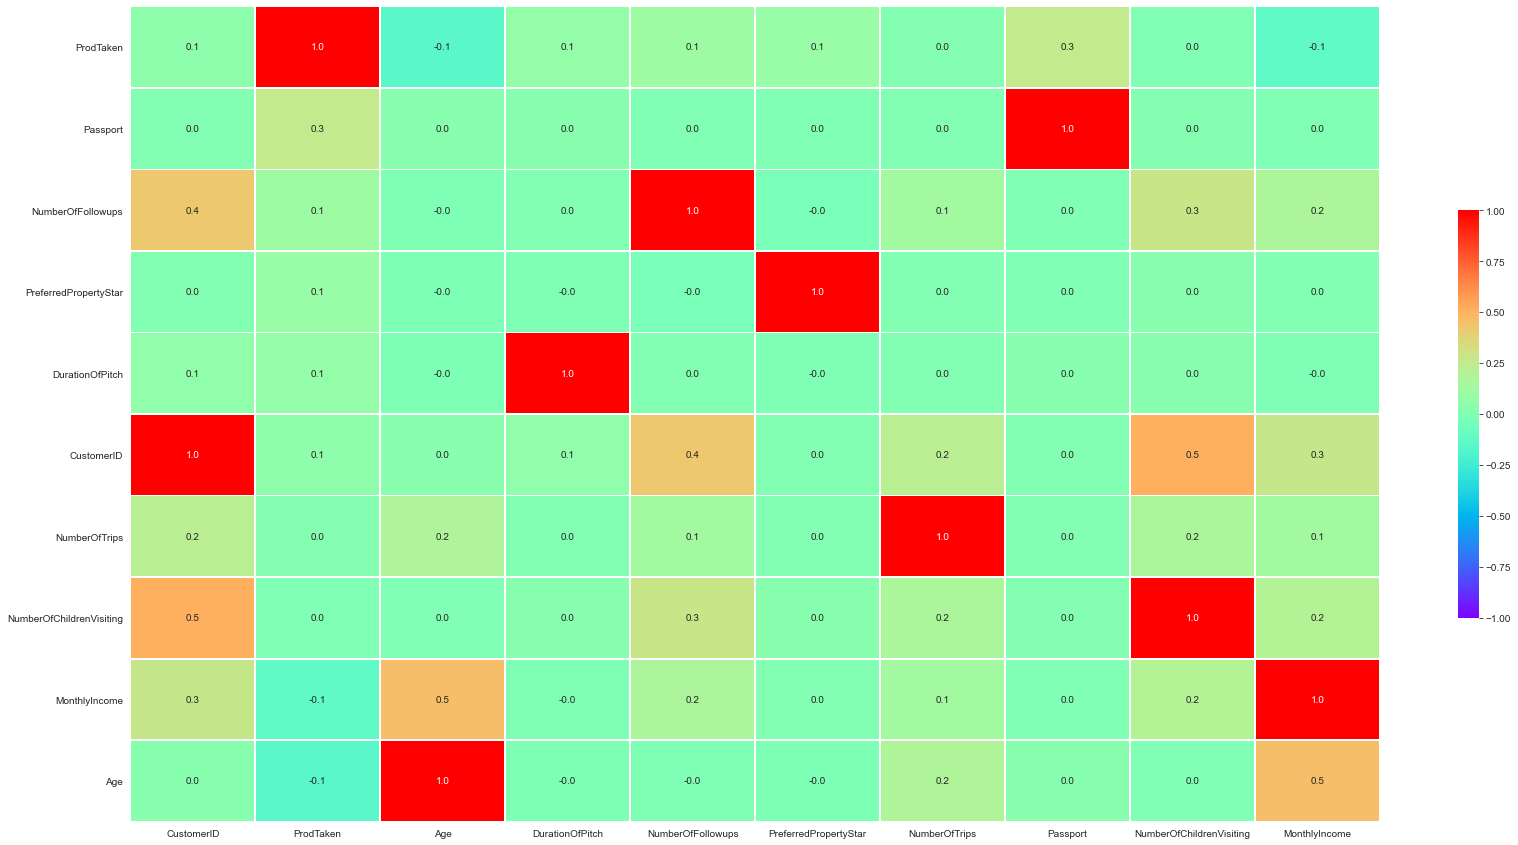

In [76]:

# correlation matrix
# cite reference:  leveraging a code snipet from the Life Expectancy Use Case

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
#numeric_columns.remove('Year') # dropping year column 
corr = df[numeric_columns].corr().sort_values(by=['ProdTaken'],ascending= False) # sorting correlations with respect to Price 

# cmap references: 
#http://alanpryorjr.com/visualizations/seaborn/heatmap/heatmap/
#https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='rainbow', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

* all variables are poorly correlated.  the strongest correlation is between Age and MonthyIncome at 0.5

* Will visualized other bivariate relationships for insights

## Function to Visualize Stacked Bar Plots

In [77]:
# looking at variable relationships to our Predictor Variable, ProdTaken
def stacked_plot(x):
    sns.set (palette = 'PiYG')
    tab1 = pd.crosstab (x,df['ProdTaken'], margins = True)
    print (tab1)
    print ('-' * 120)
    tab = pd.crosstab (x,df['ProdTaken'], normalize = 'index')
    tab.plot (kind = 'bar', stacked = True, figsize = (10,5))
    plt.show()

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2837  607  3444
All              3946  917  4863
------------------------------------------------------------------------------------------------------------------------


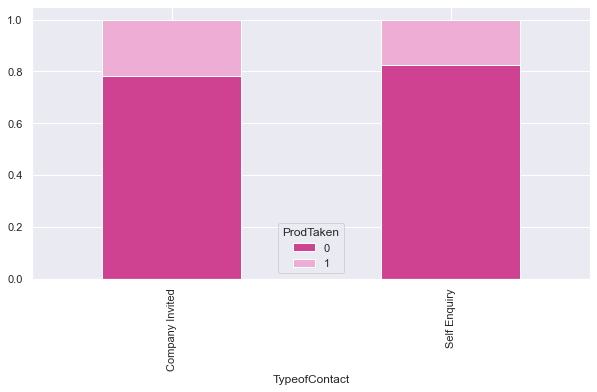

In [78]:
stacked_plot(df['TypeofContact'])

* Inspite of most customers finding the company by Self-Enquiry, there is no real difference in how travel packages are purchaed based on first contact method.

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


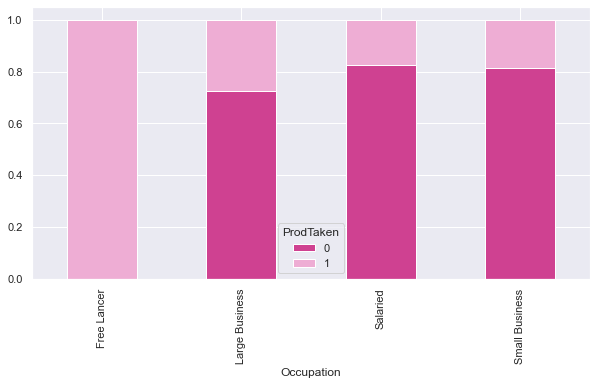

In [79]:
stacked_plot(df['Occupation'])

* 100% of Free lancers bought a travel pacakage, however there were only two Free Lancer customers in the data set.

* ~ 25% of Large Business customers buy a Travel package.  
* ~ 18% of Salaried and Small Business buy a Travel package.


ProdTaken     0    1   All
Gender                    
Fe Male     130   25   155
Female     1500  317  1817
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


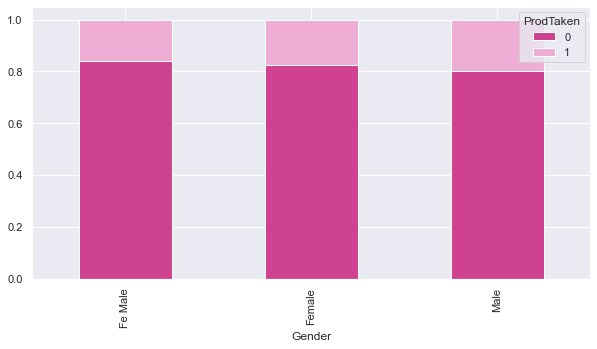

In [80]:
stacked_plot(df['Gender'])

* There is no significant difference between Males and Females when buying a Traval Package.

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


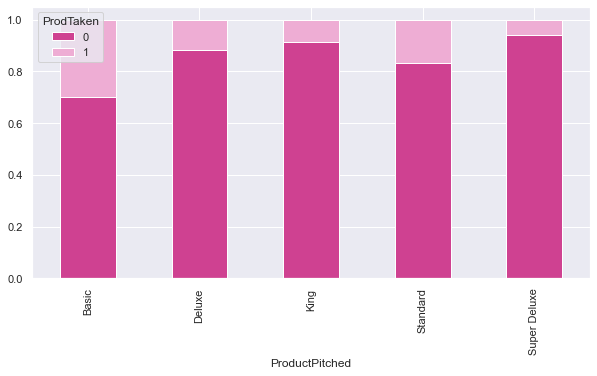

In [81]:
stacked_plot(df['ProductPitched'])

* ~ 30% of customers pitched the Basic pacakage buy, compared to ~18% Standard, ~15% Deluxe, ~10% King, and ~5% Super Deluexe.

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


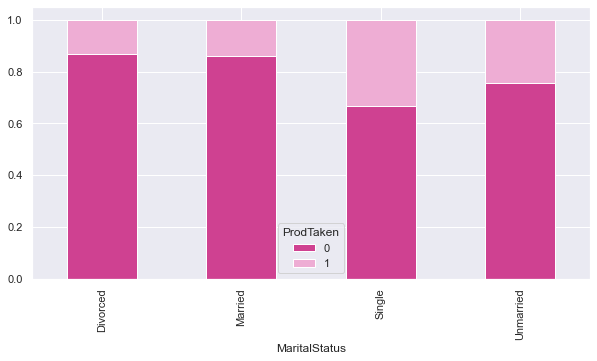

In [82]:
stacked_plot(df['MaritalStatus'])

* ~ 15% of Married and Divorced customers buy a package.  Single people buy the most at about 35%.

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


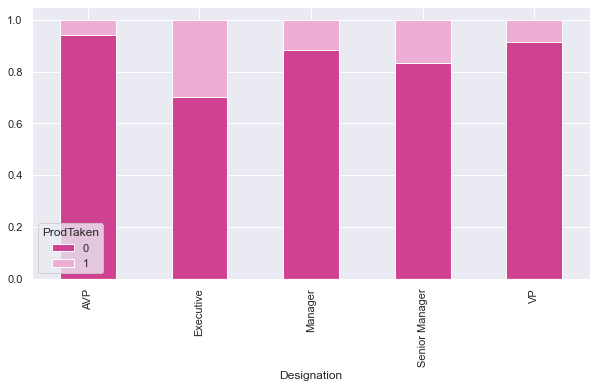

In [83]:
stacked_plot(df['Designation'])

* Executives buy the most out of the different Occupations at about 30%. 

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
1                         39    0    39
2                       1151  267  1418
3                       1942  460  2402
4                        833  193  1026
5                          3    0     3
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


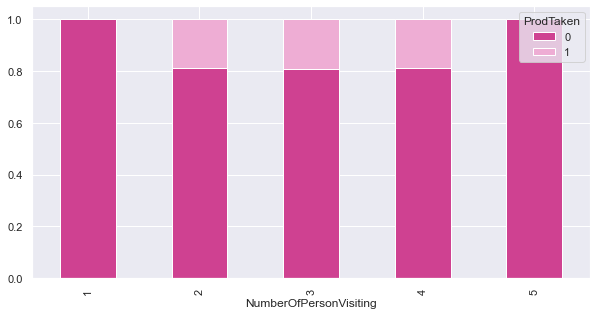

In [84]:
stacked_plot(df['NumberOfPersonVisiting'])

* Some conflits in the data. Previously, we saw that singles had the highest attach rate on packages.  He we see that customers traveling solo or with 5 people did not buy any packages. For those traveling between 2 and 4 people, the attach rate is about ~20%.

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


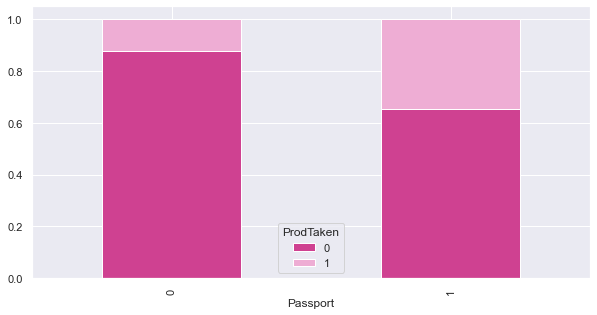

In [85]:
stacked_plot(df['Passport'])

*  ~ 35% of customers with a Passport bought a package.  Over 2X likely to buy over those without a passport.

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


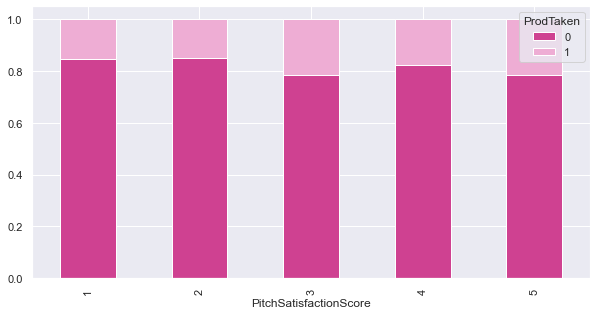

In [86]:
stacked_plot(df['PitchSatisfactionScore'])

* It is unclear if the quality of the sales pitch really influences buying a package. Those receiving the lowest scores (1 and 2 ) where roughly equivalent to a 4, while 3 and 5 were roughly equivalent for attach rate.

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


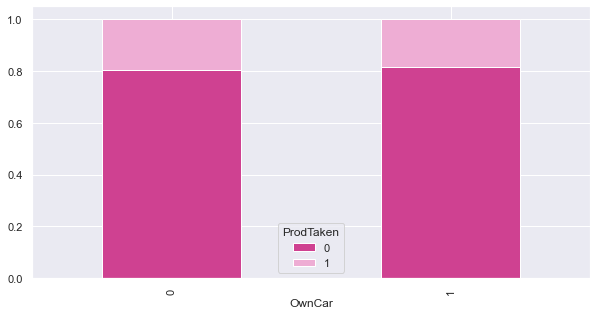

In [87]:
stacked_plot(df['OwnCar'])

* Car ownership doesn't affect attach rate.


ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1689  379  2068
5.0                 577  191   768
6.0                  82   54   136
All                3931  912  4843
------------------------------------------------------------------------------------------------------------------------


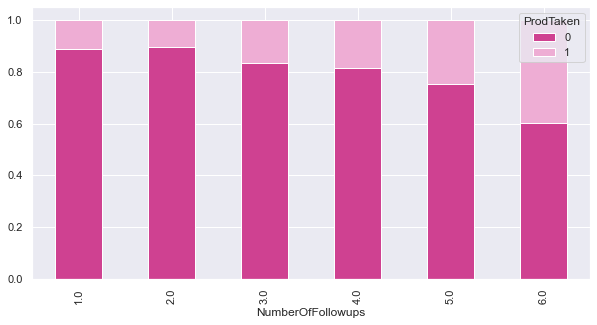

In [88]:
stacked_plot(df['NumberOfFollowups'])

* Attach rate increases with each follow up. Little difference in 1-2 touches.  Steadily increases from 3-6, from 18% to 40%.  This will inform the lead nurturing and sales process.

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2511  482  2993
4.0                     731  182   913
5.0                     706  250   956
All                    3948  914  4862
------------------------------------------------------------------------------------------------------------------------


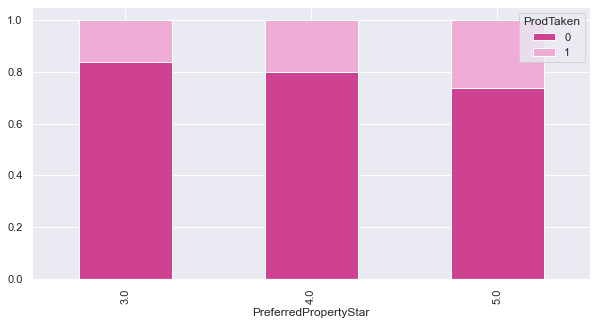

In [89]:
stacked_plot(df['PreferredPropertyStar'])

* Attach rate increases as the quality of property increases, suggesting that customers who are willing to pay more for the hotel property, also prefer packages.

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
0.0                        880  202  1082
1.0                       1688  392  2080
2.0                       1082  253  1335
3.0                        259   66   325
All                       3909  913  4822
------------------------------------------------------------------------------------------------------------------------


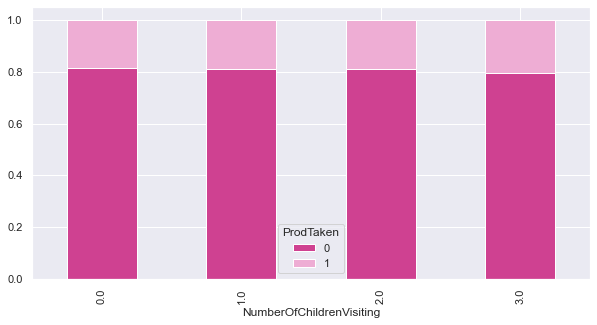

In [90]:
stacked_plot(df['NumberOfChildrenVisiting'])

* Attach rate for travel packages does not seem to be influence by how may children under 5 traveling on the trip.

In [91]:
### Function to plot distributions and Boxplots of customers who bought a travel package
def plot(x,target='ProdTaken'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of customers who bought a Travel Package')
    sns.distplot(df[(df[target] == 1)][x],ax=axs[0,0],color='pink')
    axs[0, 1].set_title("Distribution of customers who did not buy a Travel Package")
    sns.distplot(df[(df[target] == 0)][x],ax=axs[0,1],color='green')
    axs[1,0].set_title('Boxplot : ProductTaken')
    sns.boxplot(df[target],df[x],ax=axs[1,0],palette='PiYG')
    axs[1,1].set_title('Boxplot : Product Taken - Without outliers')
    sns.boxplot(df[target],df[x],ax=axs[1,1],showfliers=False,palette='PiYG')
    plt.tight_layout()
    plt.show()

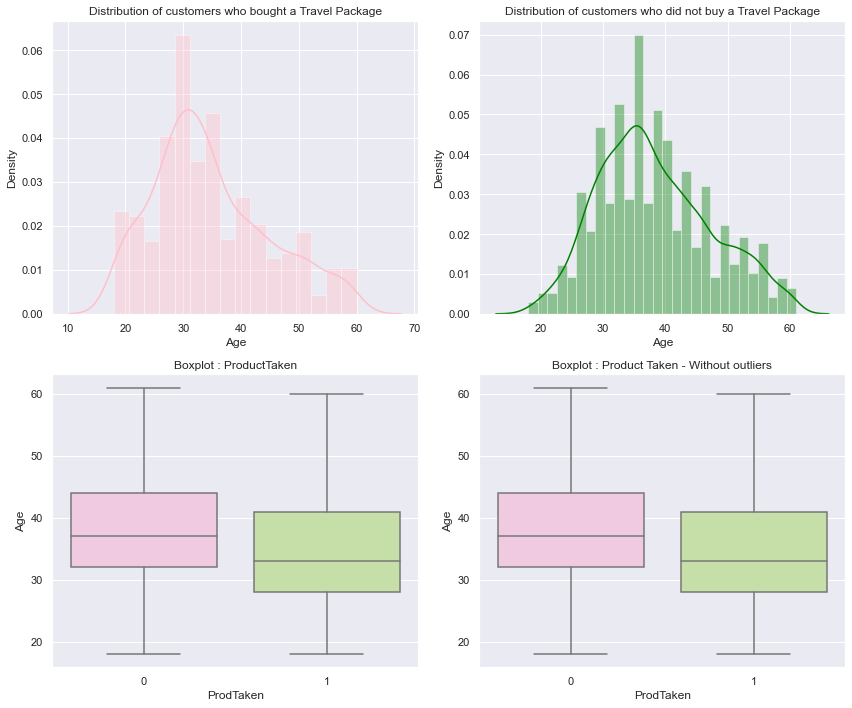

In [92]:
plot('Age')

* No material differences in Age of customers who bought or did not buy a package.

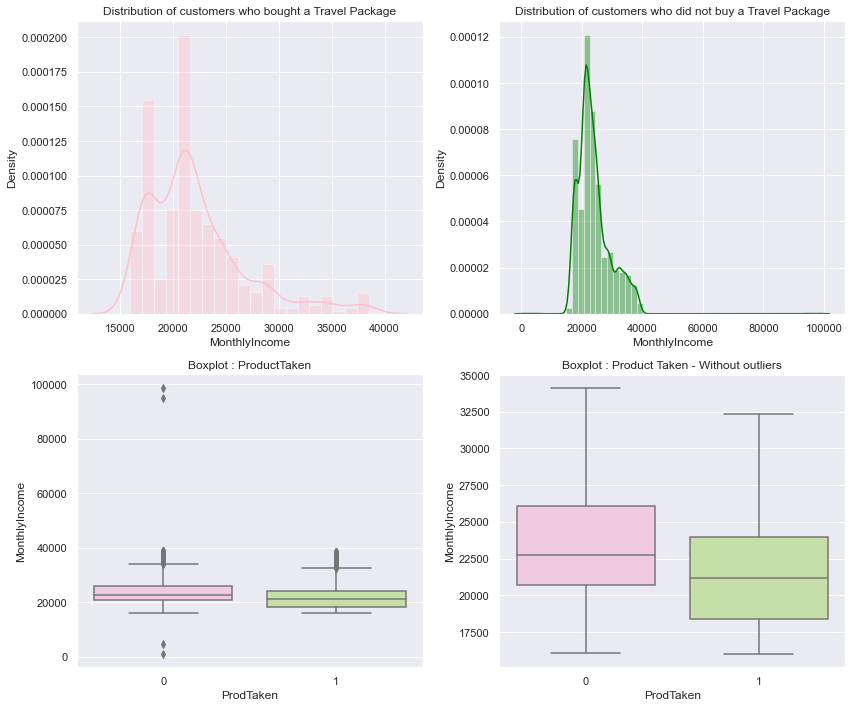

In [93]:
plot ('MonthlyIncome')

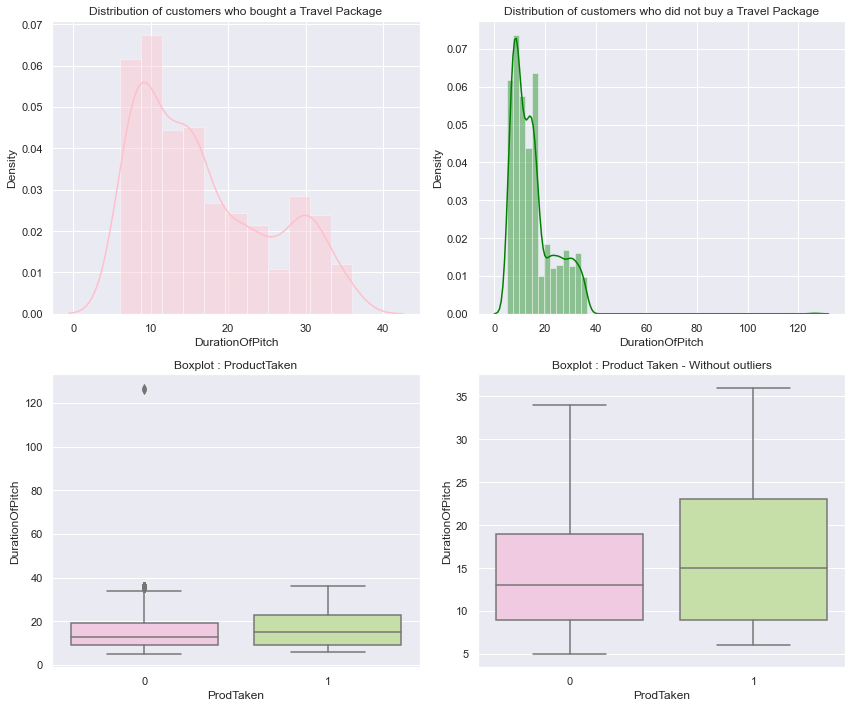

In [94]:
plot('DurationOfPitch')

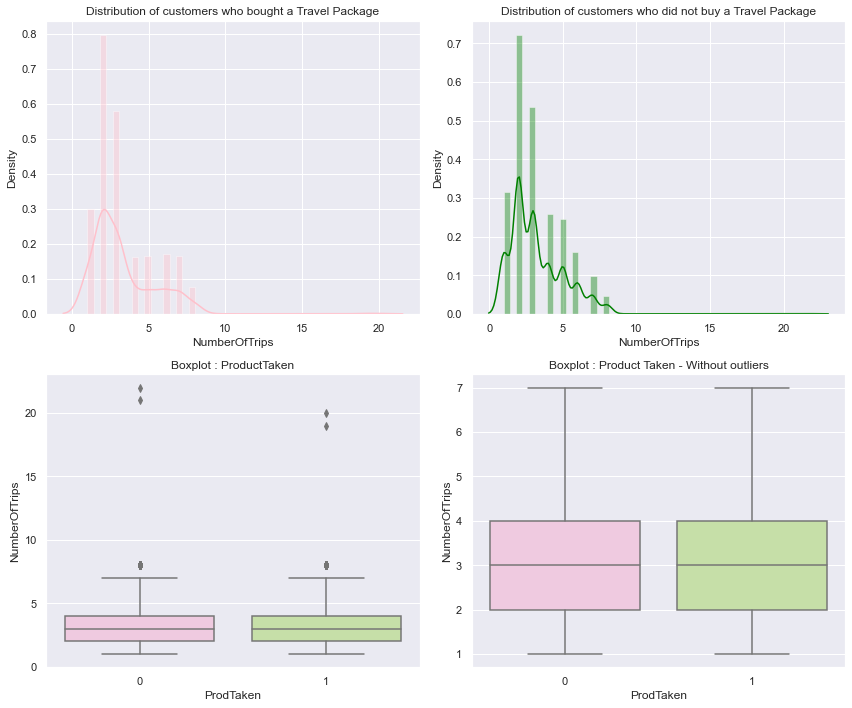

In [95]:
plot('NumberOfTrips')

## Multi-variate Analysis

In [96]:
# step through numerical data, pivoting on ProdTaken
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   category
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

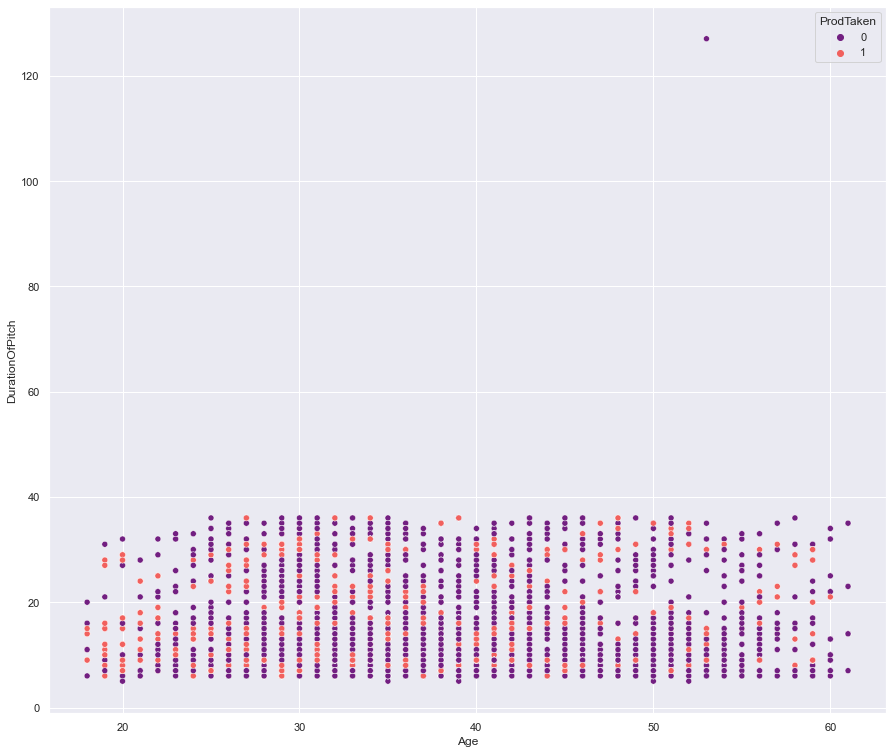

In [97]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='DurationOfPitch', x='Age', hue='ProdTaken', data=df, palette ='magma');

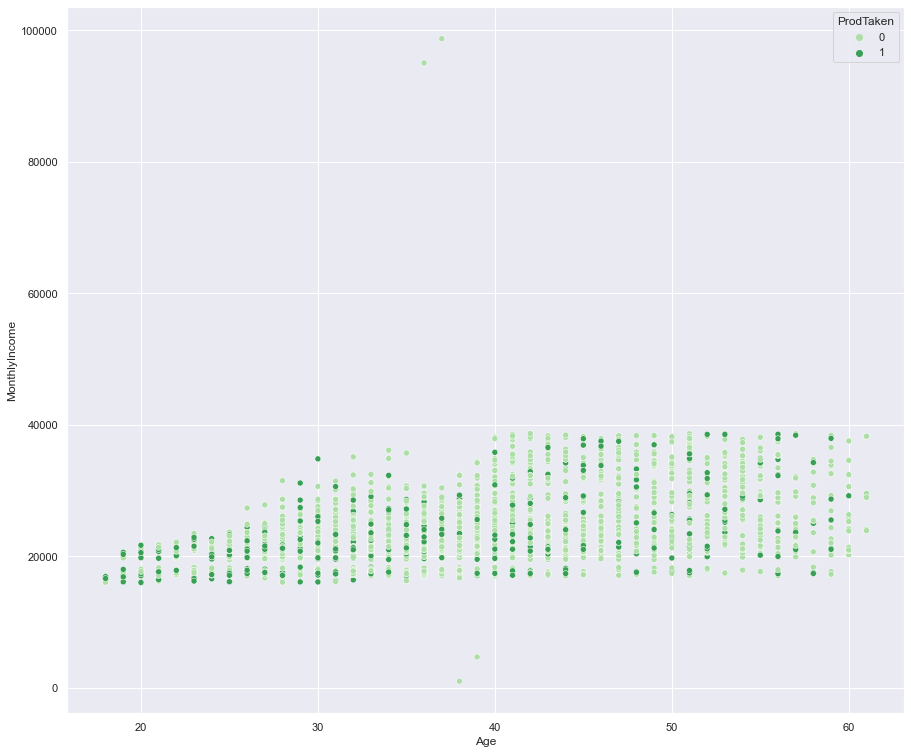

In [98]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='MonthlyIncome', x='Age', hue='ProdTaken', data=df, palette ='Greens');

# <a id = "link2"></a> 2. Insights based on EDA


EDA Observations and Customer / Buying Profile:

* Customers in the data range from 18 t0 61 years old with the average customer being 37-38 years old.  Half of the Customers are between 31-44 years old. Age is right skewed toward with no outliers.  Looking at bivariate correlation, a customer’s age and their monthly income are positively correlated with a Pearson coefficient of 0.5.  All other bivariate correlations are very poor. This is intuitive.  Age and Monthly Income typically track well.

* 65% of Customers come from Tier 1 cities.  These cities are the most developed in terms of facilities and living standards.  They also have higher population densities.  31% of Customers come from the Tier 3 cities, the least developed.  The remaining 4% of the Customers come from Tier 2 cities.   

* 49% of Customers work in Salaried positions, while 42.6% work in Small Businesses, 8.8% in Large Businesses, and only an extremely small number of Customers 0.04% are classified as Freelancers.

* 60% of Customers are Male.  48% are Married.  Approximately 38% of Customers are Single or Divorced, evenly split.  14% of Customers characterize themselves as Unmarried (presumably these Customers travel as a couple, but are unmarried).  62% of the Customers own a car and 71% do not have a Passport.  The predominance of Customers without passports suggest that Visit with Us is mostly sought after for Domestic Travel.

* The Customers in this data set are predominantly in leadership positions.  No one identified themselves as an Individual Contributor, an interesting statistic given the data set should be a cross - section of the workforce and we would expect at least one individual contributor in the mix.  ~35% of Customers are Managers, ~15% are Sr. Managers, and the other 50% of Customers are some form of Executive (Executive, VP, AVP).

* Most Customers in the database were the result of Self Inquiry (70%), suggesting that Visit with Us may want to focus on other avenues of customer outreach and demand generation. Relying on self-enquiry is stochastic in nature and if this is how the Customers buy from Visit with Us (or the industry in general), there needs to be a strong strategy for growth and increasing traffic to their company.  A stronger strategy is understanding why Customers are buying this way and if this could be influenced by having a targeted outreach campaign (beyond the scope of this review).  It could also suggest that Visit with Us needs to improve their data attribution for customer contact and understand how Customers came to learn about Visit with Us.


* When Customers travel, they prefer a property that is at least 3-star rated (62%), the balance prefer even split of 4-star and 5-star properties.  Given that the property rating is positively correlated with the cost per night, the predominance of Visit with Us Customers are looking for a good value.  There are between 1 and 5 people in the travel party, although very few (< 1% combined) people travel by themselves or with 5 people in the party.  Almost 50% of Customers travel with 3 people, presumably a couple with one child.  29% travel in pairs (couples), with 20% traveling with 4 people (possibly a couple and 2 children).  This aligns with the data around the number of Customers traveling with children under 5 years old.  Only 25% of all Customers travel with 0.  The balance between 1 and 3, with about 50% having at least 1 child under the age of 5.  Customers take an average 3.23 trips per year. Their minimum is 1 trip and maximum of 22. Half of all Customers take between 2 and 4 trips per year.

* Customers have a good deal of diversity in MonthlyIncome.  Customers have on average a Gross Monthly Income of 23,619.85 USD, or 283,438 USD pa. The minimum is 1000 USD per month. The max is 98,678 USD per month with 50% of Customers having between 20,346 USD and 25,571 USD per month. This seems really high and probably reflects gross monthly income for the entire household or the dataset is in error for the currency.  

### Purchasing Behavior for Travel Packages (referred to as attach rate below):

* The selling process for Travel Packages can be characterized by looking at the pitch duration, the sales pitch score, the product pitched, and the number of follow ups.

* The mean time of a Sales Pitch for travel packages is 15.5 minutes, with a minimum pitch of 5 minutes, and maximum of 2 hours and 7 min (a super long sales pitch).  Sales people follow up on average about 3.7 times after the sales pitch. There is at least 1 follow up and there is a maximum of 6 follow ups (or effectively, badgering the customers). The most prevalent score on the sales pitch is 3 (middle score). Those who rated the pitch, rated them very similarly above and below the middle score.

* 50% of customers sit through a pitch lasting 9 minutes to 20 minutes.  Over half the customers (~53%) are pitched Basic/Standard packages. 35% of customers received a pitch for Deluxe packages. ~12% of customers received a pitch for King and Super Deluxe.

* Correlating features to whether Customers actually buy a Travel Package shows very poor correlation.  The only mild correlation as mentioned earlier is between Age and Monthly Income.

### Looking at Each Feature and the tendency to buy or not buy a Travel Package, we learn that:

* In spite of most Customers finding the company by Self-Enquiry, there is no real difference in how travel packages are purchased based on first contact method.

* 100% of Freelancers bought a travel package, however there were only two Freelancer Customers in the data set.
* ~ 25% of Large Business Customers buy a Travel package.

* ~ 18% of Salaried and Small Business buy a Travel package.

* There is no significant difference between Males and Females when buying a Traval Package.

* ~ 30% of Customers pitched the Basic package buy, compared to ~18% Standard, ~15% Deluxe, ~10% King, and ~5% Super Deluxe.

* ~ 15% of Married and Divorced Customers buy a package. Single people buy the most at about 35%.

* Executives buy the most out of the different Occupations at about 30%.

* Customers traveling solo or with 5 people did not buy any packages. For those traveling between 2 and 4 people, the attach rate is about ~20%.

* ~ 35% of Customers with a Passport bought a package. Over 2X likely to buy over those without a passport.

* It is unclear if the quality of the sales pitch really influences buying a package. Those receiving the lowest scores (1 and 2 ) were roughly equivalent to a 4, while 3 and 5 were roughly equivalent for attach rate.

* Car ownership doesn't affect the attach rate.

* Attach rate increases with each follow up. Little difference in 1-2 touches. Steadily increases from 3-6, from 18% to 40%. This will inform the lead nurturing and sales process.

* Attach rate increases as the quality of property increases, suggesting that Customers who are willing to pay more for the hotel property, also prefer packages.

* Attach rate for travel packages does not seem to be influenced by how many children under 5 years old are traveling on the trip.
* ~ 30% of customers pitched the Basic package buy, compared to ~18% Standard, ~15% Deluxe, ~10% King, and ~5% Super Deluxe.

* Attach rate increases as the quality of property increases, suggesting that customers who are willing to pay more for the hotel property, also prefer packages.





#   <a id = "link3"></a> 3.  Data Pre-processing 

*  Preparing the data for analysis

*  Missing value treatment, outlier detection/treatment, feature engineering, data prep, model split


## Treating missing values and other data defects

* Treat obviously missing values highlighted during EDA

* Check for obscure "missing" values. Namely, 0's in columns where there shouldn't be 0's

* Correct other data defects highlighted in EDA




In [99]:
# treat obviouslying missing data first

df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [100]:
# checking to see if there are any columns that have zeroes which should not be there
#(df == 0).sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   category
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

In [101]:
# Choosing to replace missing values with the mean value in the numeric columns
#medianFiller = lambda x: x.fillna(x.median())
#numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
#df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

mean_cols = ['Age','DurationOfPitch','MonthlyIncome', 'NumberOfFollowups','PreferredPropertyStar',
             'NumberOfTrips','NumberOfChildrenVisiting']
meanFiller = lambda x: x.fillna(x.mean())
df[mean_cols] = df[mean_cols].apply(meanFiller, axis = 0)
df.isna().sum()

CustomerID                   0
ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

In [102]:
df['TypeofContact'] = df['TypeofContact'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4888 non-null   float64 
 3   TypeofContact             4863 non-null   object  
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4888 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   category
 9   NumberOfFollowups         4888 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4888 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4888 non-null   float6

In [103]:
df['TypeofContact'].unique()

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

In [104]:
df['TypeofContact']=df['TypeofContact'].fillna('unknown')

In [105]:
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [106]:
df['TypeofContact'].unique()

array(['Self Enquiry', 'Company Invited', 'unknown'], dtype=object)

In [107]:
df['TypeofContact'] = df['TypeofContact'].astype('category')
df['TypeofContact'].dtype

CategoricalDtype(categories=['Company Invited', 'Self Enquiry', 'unknown'], ordered=False)

## address outliers

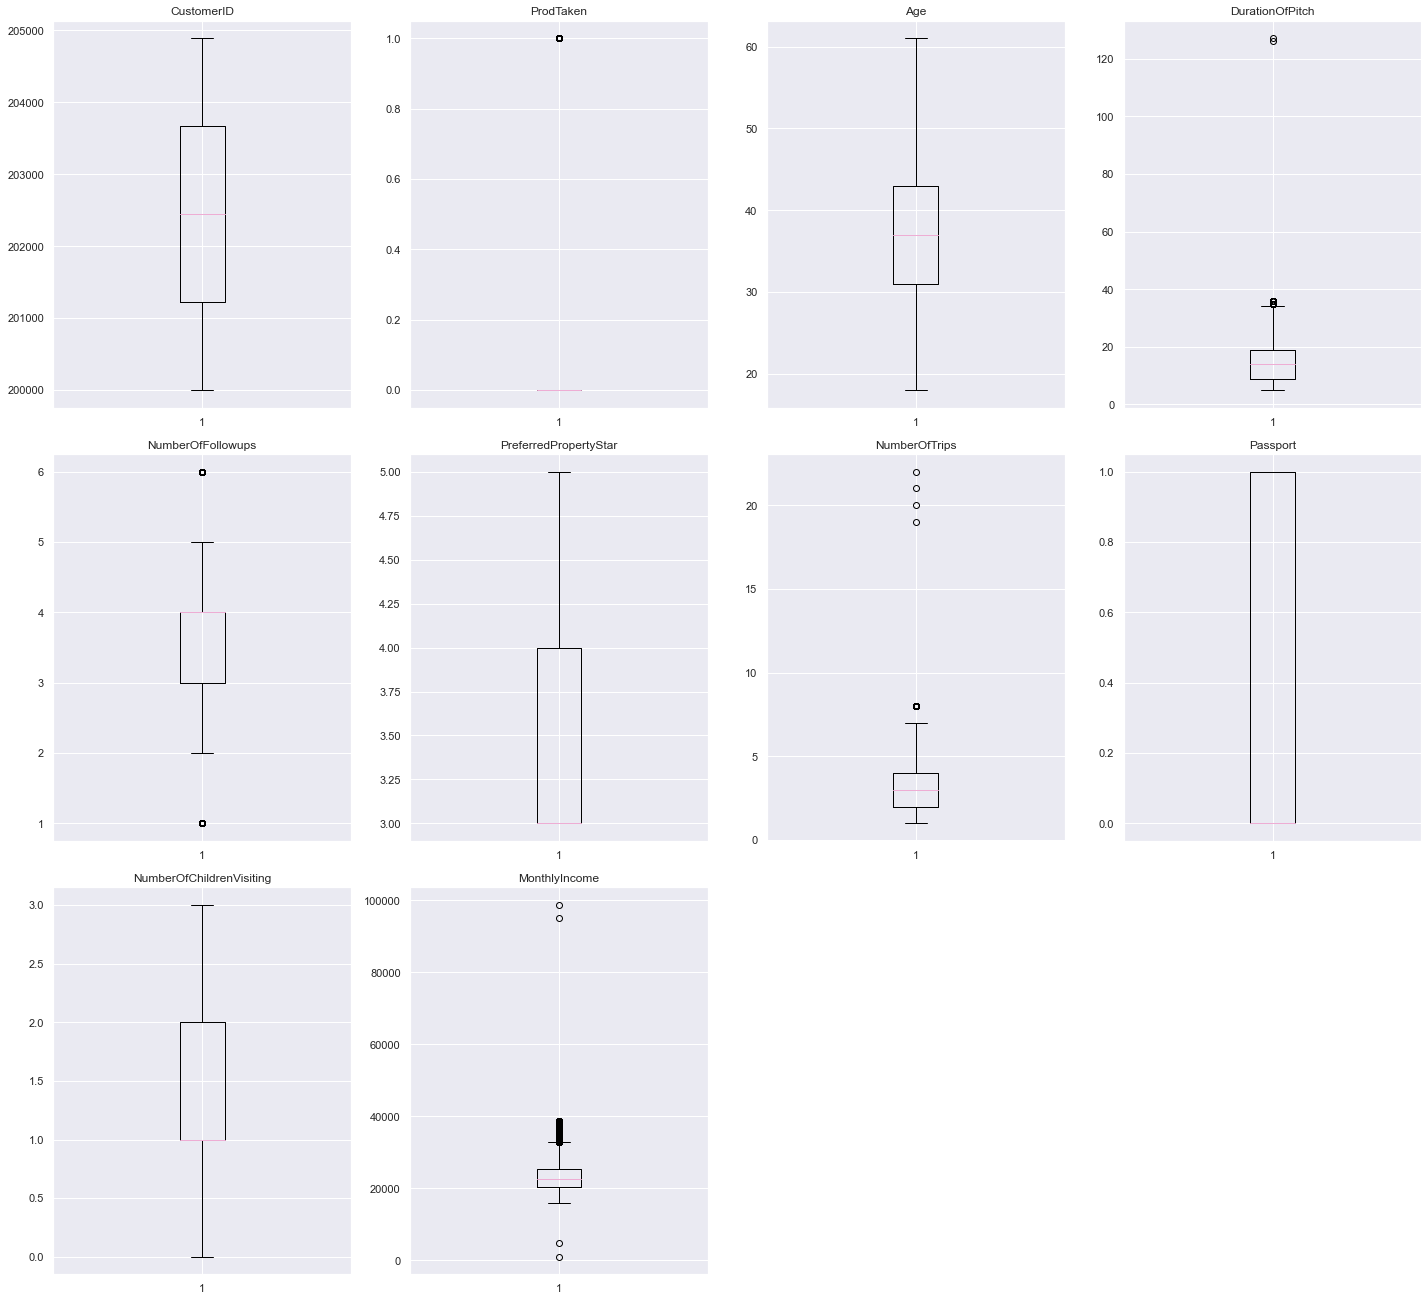

In [108]:
#Cite reference:  from Life Expectancy Case Stdy
# outlier detection aggregated in one spot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [109]:

#Flooring and capping method for Outlier Treatment


col_list = ['DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome']


def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df


def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of specific numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df




In [110]:
numerical_col = ['DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome']
df = treat_outliers_all(df,numerical_col)

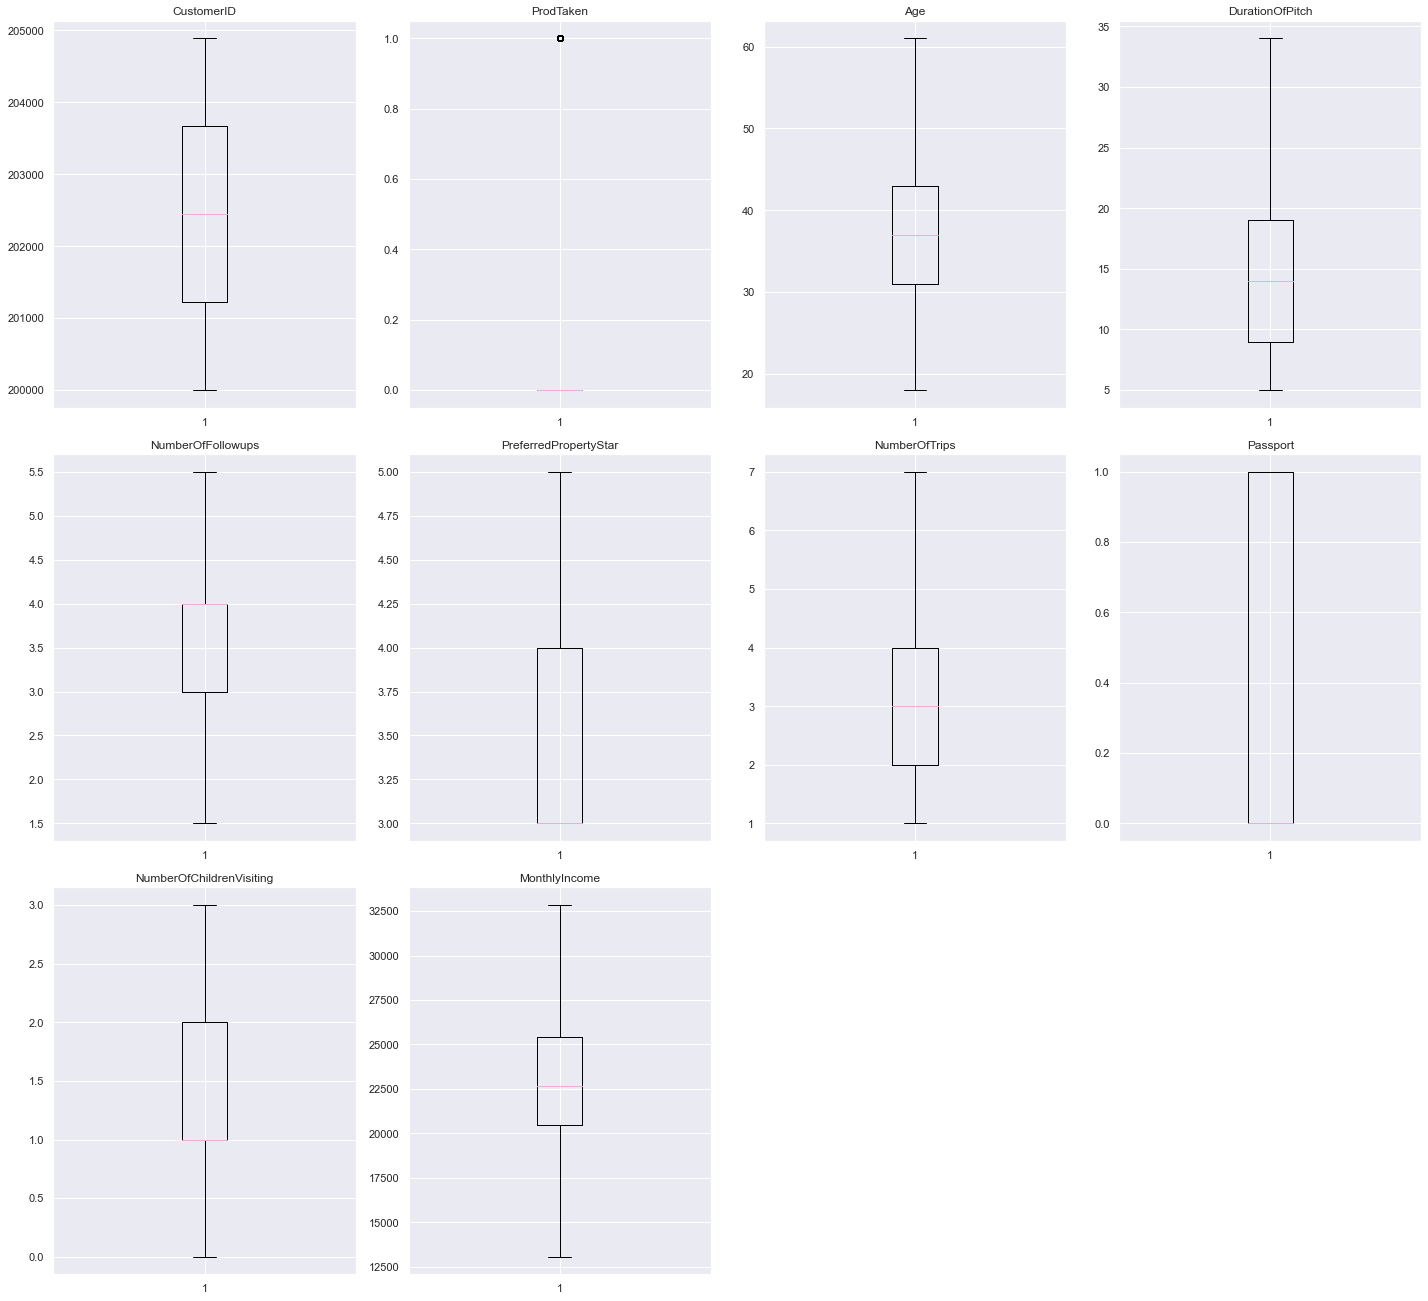

In [111]:
# plot to confirm outliers have been treated
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

## Need to fix other data defects 

* Gender - there is a category called Fe Male which is clearly intended to be Female.  Will fix Fe Male to Female.

* MaritalStatus - there are two categories (Divorced and Unmarried) which are equivalent to Single. Will combine all to Single.

* Designation - AVP and VP are a finer grain of Executives. Will combine all into Executives.





In [112]:
# Correcting Gender

df['Gender'] = df['Gender'].replace(['Fe Male'],'Female')
df['Gender'].unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [113]:
# Correcting MaritalStatus

df['MaritalStatus'] = df['MaritalStatus'].replace(['Divorced', 'Unmarried'],'Single')
df['MaritalStatus'].unique()


['Single', 'Married']
Categories (2, object): ['Single', 'Married']

In [114]:
# Correcting Designation

df['Designation'] = df['Designation'].replace(['AVP', 'VP'],'Executive')
df['Designation'].unique()

['Manager', 'Executive', 'Senior Manager']
Categories (3, object): ['Manager', 'Executive', 'Senior Manager']

## one-hot encoding the categorical variables

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4888 non-null   float64 
 3   TypeofContact             4888 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4888 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   category
 9   NumberOfFollowups         4888 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4888 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4888 non-null   float6

In [116]:
# delete CustomerID

del df['CustomerID']
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].astype('category')
df['OwnCar'] = df['OwnCar'].astype('int64')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   category
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   int64 

In [117]:
# need to one-hote encode Categorical columns

dummy_data = pd.get_dummies(df, columns=['TypeofContact','CityTier','Occupation','Gender'
                                         ,'NumberOfPersonVisiting','ProductPitched','PreferredPropertyStar'
                                         ,'MaritalStatus','PitchSatisfactionScore'
                                         ,'Designation'],drop_first=True)

dummy_data.head()

,ProdTaken,Age,DurationOfPitch,NumberOfFollowups,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Self Enquiry,TypeofContact_unknown,CityTier_2,CityTier_3,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,NumberOfPersonVisiting_2,NumberOfPersonVisiting_3,NumberOfPersonVisiting_4,NumberOfPersonVisiting_5,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,PreferredPropertyStar_3.581036610448375,PreferredPropertyStar_4.0,PreferredPropertyStar_5.0,MaritalStatus_Single,PitchSatisfactionScore_2,PitchSatisfactionScore_3,PitchSatisfactionScore_4,PitchSatisfactionScore_5,Designation_Manager,Designation_Senior Manager
0,1,41.000000,6.0,3.0,1.0,1,1,0.0,20993.0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
1,0,49.000000,14.0,4.0,2.0,0,1,2.0,20130.0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0
2,1,37.000000,8.0,4.0,7.0,1,0,0.0,17090.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,33.000000,9.0,3.0,2.0,1,1,1.0,17909.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,37.622265,8.0,3.0,1.0,0,1,0.0,18468.0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [118]:
df = dummy_data.copy()
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ProdTaken                                4888 non-null   int64  
 1   Age                                      4888 non-null   float64
 2   DurationOfPitch                          4888 non-null   float64
 3   NumberOfFollowups                        4888 non-null   float64
 4   NumberOfTrips                            4888 non-null   float64
 5   Passport                                 4888 non-null   int64  
 6   OwnCar                                   4888 non-null   int64  
 7   NumberOfChildrenVisiting                 4888 non-null   float64
 8   MonthlyIncome                            4888 non-null   float64
 9   TypeofContact_Self Enquiry               4888 non-null   uint8  
 10  TypeofContact_unknown                    4888 no

In [119]:
df.head()

,ProdTaken,Age,DurationOfPitch,NumberOfFollowups,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Self Enquiry,TypeofContact_unknown,CityTier_2,CityTier_3,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,NumberOfPersonVisiting_2,NumberOfPersonVisiting_3,NumberOfPersonVisiting_4,NumberOfPersonVisiting_5,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,PreferredPropertyStar_3.581036610448375,PreferredPropertyStar_4.0,PreferredPropertyStar_5.0,MaritalStatus_Single,PitchSatisfactionScore_2,PitchSatisfactionScore_3,PitchSatisfactionScore_4,PitchSatisfactionScore_5,Designation_Manager,Designation_Senior Manager
0,1,41.000000,6.0,3.0,1.0,1,1,0.0,20993.0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
1,0,49.000000,14.0,4.0,2.0,0,1,2.0,20130.0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0
2,1,37.000000,8.0,4.0,7.0,1,0,0.0,17090.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,33.000000,9.0,3.0,2.0,1,1,1.0,17909.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,37.622265,8.0,3.0,1.0,0,1,0.0,18468.0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [120]:
df.isna().sum()

ProdTaken                                  0
Age                                        0
DurationOfPitch                            0
NumberOfFollowups                          0
NumberOfTrips                              0
Passport                                   0
OwnCar                                     0
NumberOfChildrenVisiting                   0
MonthlyIncome                              0
TypeofContact_Self Enquiry                 0
TypeofContact_unknown                      0
CityTier_2                                 0
CityTier_3                                 0
Occupation_Large Business                  0
Occupation_Salaried                        0
Occupation_Small Business                  0
Gender_Male                                0
NumberOfPersonVisiting_2                   0
NumberOfPersonVisiting_3                   0
NumberOfPersonVisiting_4                   0
NumberOfPersonVisiting_5                   0
ProductPitched_Deluxe                      0
ProductPit

# <a id = "link4"></a> 4. Model Building & 5. Model Tuning (integrated)

* Model Tuning = Model performance improvement via Hyperparameter Tuning


## Split the Data into Training and Test Sets

* using stratified sampling to preserve relative class frequencies are maintained in train and test data sets.

In [121]:
from sklearn.model_selection import train_test_split

X = df.drop('ProdTaken',axis=1)     # Predictor feature columns
y = df['ProdTaken']   # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29, stratify = y)
# using 29 as the random seed
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(3421, 34) (1467, 34)
(3421,) (1467,)


In [122]:
df['ProdTaken'].describe().T

count    4888.000000
mean        0.188216
std         0.390925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: ProdTaken, dtype: float64

### check the split of the training and test data

In [123]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

69.99% data is in training set
30.01% data is in test set


* 70% - 30% split on train - test sets

### check true : false ratio for ProdTaken (i.e., 0=false "did not buy a travel package", 1 = true "did buy a travel pacakage")

In [124]:
print("Original ProdTaken True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['ProdTaken'] == 1]), (len(df.loc[df['ProdTaken'] == 1])/len(df.index)) * 100))
print("Original ProdTaken False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['ProdTaken'] == 0]), (len(df.loc[df['ProdTaken'] == 0])/len(df.index)) * 100))
print("")
print("Training ProdTaken True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training ProdTaken False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test ProdTaken True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test ProdTaken False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original ProdTaken True Values    : 920 (18.82%)
Original ProdTaken False Values   : 3968 (81.18%)

Training ProdTaken True Values    : 644 (18.82%)
Training ProdTaken False Values   : 2777 (81.18%)

Test ProdTaken True Values        : 276 (18.81%)
Test ProdTaken False Values       : 1191 (81.19%)



* We want to preserve the balance of True and False for our predictor variable between train and test sets

## Model evaluation criteria

1.  Identify where the Model can fail and the impact to the business user:
    * Predicting that the customer WILL buy a Travel Package and they actually DO NOT buy a Travel Package.  (FP)
    
    * Predicting that the customer will NOT buy a Travel Package and they actually DO buy a Travel Package. (FN)

2.  Which of the Model failures is more impacting to the business user?

    * Will the business user be hurt more if they expect a certain level of sales for Travel Packages and these revenues do not materialize (FP), or by predicting a customer will not buy a Travel Package and they actually do buy (i.e., an upside in sales?) (FN)

    * The downside of predicting they will have higher Travel Package sales and missing their sales plan could be significant.  The business user could be making business decisions around hiring or other investments based on this level of revenue and misses could be very impactful, creating profitability losses.

    * The downside of predicting a customer will not buy a Travel Package and they actually do buy a Travel Package is minimally impactful.  In fact it is upside and will provide more actionable insights into our marketing efforts and will provide a basis for model improvement.  
    

3. So, model performance will be centered around minimizing False Positives, or maximizing True Positives.  Therefore we will use Precision.  The higher the Precision, the better.  Precision = TP/(TP + FP)




True Positive (TP)  is:  

Predict they will buy a travel package and they buy a travel package.  Predict = Y, Actual = Y

False Positive (FP)  is:

Predict they will buy a travel package and they don’t buy a travel package.  Predict = Y, Actual = N

True Negative (TN)  is:

Predict they will not buy a travel package and they don’t buy a travel package.  Predict = N, Actual = N

False Negative (FN)  is:  

Predict they will not buy a travel package and they do buy a travel package.  Predict = N, Actual = Y



* Again, we are trying to maximize the amount of True Positives (TP) or minimize the amount of False Positives (FP) by increasing model precision with each Model iteration and tuning.  We look at how the model is performing on Unseen Data to determine the quality of the predictions produced by the model.


### Implementing functions to report metric scores (accuracy, recall, and precision) on train and test sets and a Confusion Matrix

In [125]:
##  Function to calculate recall score
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [126]:
##  Function to calculate precision score
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [127]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [128]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Decision Tree

* Using DecisionTreeClassifier with default gini settings for splits


* Ensuring that we do not bias the model by using a class weight that doesn't align to the original distribution of True and False for ProdTaken.  The True rate in the original data set is:

    Original ProdTaken True Values    : 920 (18.82%)
    Original ProdTaken False Values   : 3968 (81.18%)
    

* preserving these class weights



In [129]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.8118,1:0.1882},random_state=1)

In [130]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.8118, 1: 0.1882}, random_state=1)

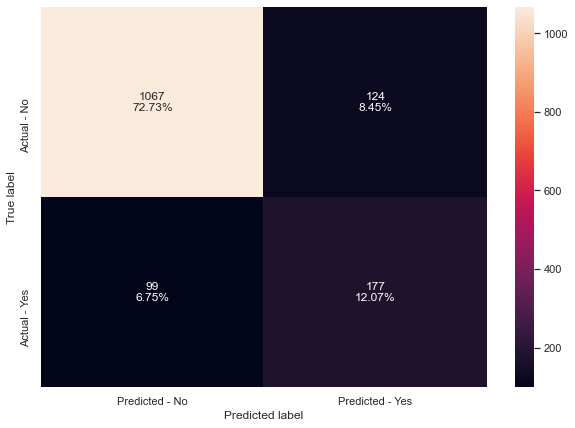

In [131]:
make_confusion_matrix(dtree,y_test)

In [132]:
dtree_acc = get_accuracy_score(dtree)
dtree_recall = get_recall_score(dtree)
dtree_precision = get_precision_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8479890933878664
Recall on training set :  1.0
Recall on test set :  0.6413043478260869
Precision on training set :  1.0
Precision on test set :  0.5880398671096345


* The model is predicting 58.8% of the True Positives (TP) on unseen data.  Predictions are 100% on the training data.  The TP rate is 12.07%.  This Decision Tree model is not performing well on unseen data and needs work. The model is overfitting the data.

## Bagging Classifier

In [133]:
# import Classifiers from sklearn for next modeling

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

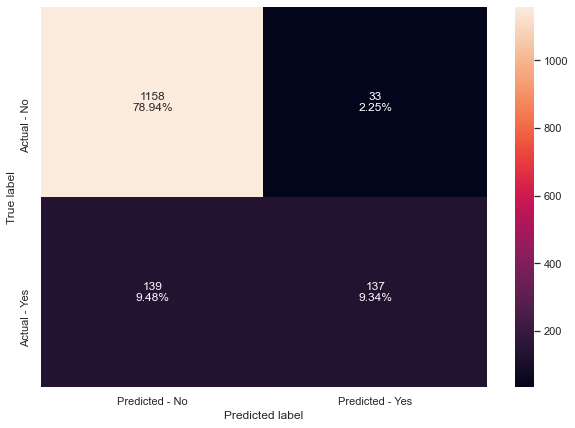

In [134]:
make_confusion_matrix(bagging,y_test)

In [135]:
bagging_acc = get_accuracy_score(bagging)
bagging_recall = get_recall_score(bagging)
bagging_precision = get_precision_score(bagging)

Accuracy on training set :  0.9935691318327974
Accuracy on test set :  0.8827539195637355
Recall on training set :  0.9658385093167702
Recall on test set :  0.4963768115942029
Precision on training set :  1.0
Precision on test set :  0.8058823529411765


## Implement BaggingClassifier with weighted scoring

In [136]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.8118,1:0.1882},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.8118,
                                                                      1: 0.1882},
                                                        random_state=1),
                  random_state=1)

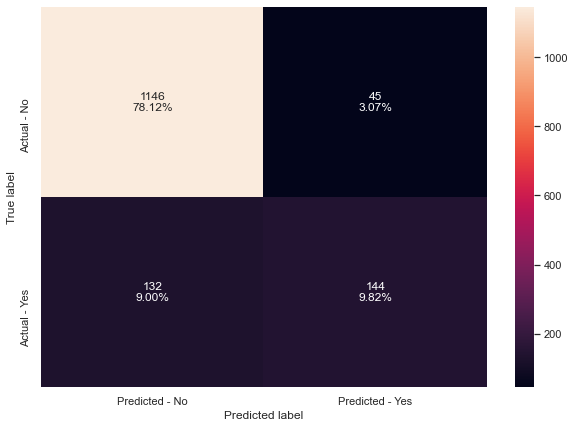

In [137]:
make_confusion_matrix(bagging_wt,y_test)

In [138]:
bagging_wt_acc = get_accuracy_score(bagging_wt)
bagging_wt_recall = get_recall_score(bagging_wt)
bagging_wt_precision = get_precision_score(bagging_wt)

Accuracy on training set :  0.994153756211634
Accuracy on test set :  0.8793456032719836
Recall on training set :  0.9720496894409938
Recall on test set :  0.5217391304347826
Precision on training set :  0.9968152866242038
Precision on test set :  0.7619047619047619


## Random Forest

In [139]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

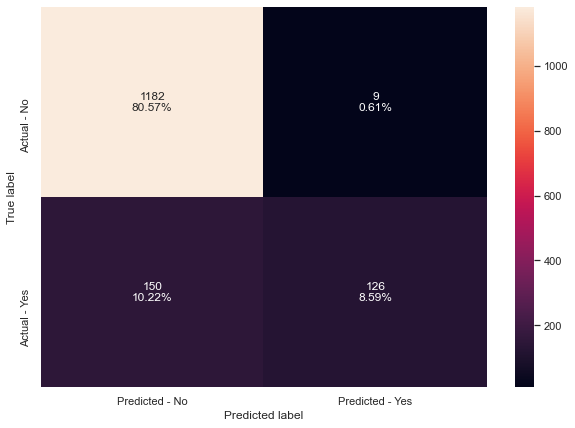

In [140]:
make_confusion_matrix(rf,y_test)

In [141]:
rf_acc = get_accuracy_score(rf)
rf_recall = get_recall_score(rf)
rf_precision = get_precision_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.8916155419222904
Recall on training set :  1.0
Recall on test set :  0.45652173913043476
Precision on training set :  1.0
Precision on test set :  0.9333333333333333


## Random Forest with weighted classifiers

In [142]:
rf_wt = RandomForestClassifier(class_weight={0:0.8118,1:0.1882}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.8118, 1: 0.1882}, random_state=1)

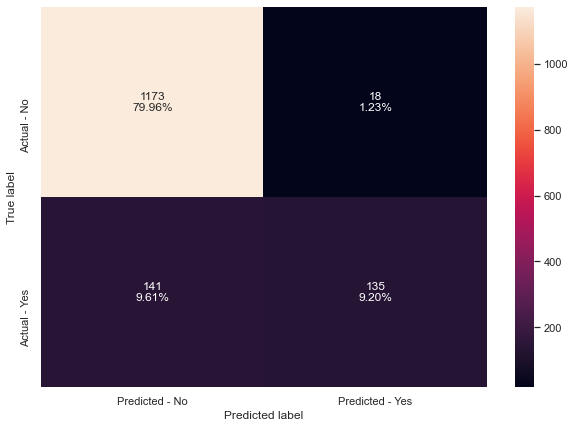

In [143]:
make_confusion_matrix(rf_wt,y_test)

In [144]:
rf_wt_acc = get_accuracy_score(rf_wt)
rf_wt_recall = get_recall_score(rf_wt)
rf_wt_precision = get_precision_score(rf_wt)

Accuracy on training set :  1.0
Accuracy on test set :  0.8916155419222904
Recall on training set :  1.0
Recall on test set :  0.4891304347826087
Precision on training set :  1.0
Precision on test set :  0.8823529411764706


## Model Tuning

## Tune Decision Tree

In [145]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.8118,1:0.1882},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.8118, 1: 0.1882}, max_depth=3,
                       max_leaf_nodes=5, min_impurity_decrease=0.0001,
                       random_state=1)

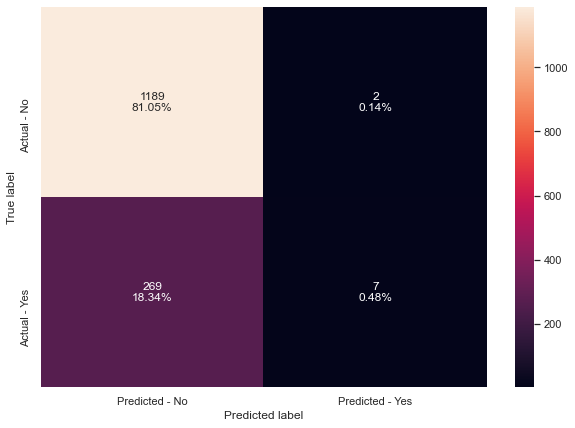

In [146]:
make_confusion_matrix(dtree_estimator,y_test)

In [147]:
tuned_dtree_acc = get_accuracy_score(dtree_estimator)
tuned_dtree_recall = get_recall_score(dtree_estimator)
tuned_dtree_precision = get_precision_score(dtree_estimator)

Accuracy on training set :  0.8178895059923998
Accuracy on test set :  0.8152692569870484
Recall on training set :  0.03260869565217391
Recall on test set :  0.025362318840579712
Precision on training set :  1.0
Precision on test set :  0.7777777777777778


## Tune BaggingClassifier

In [148]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0: 0.8118, 1: 0.1882},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.8118,
                                                                                 1: 0.1882},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [149]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.8118,
                                                                      1: 0.1882},
                                                        random_state=1),
                  max_features=0.9, n_estimators=51, random_state=1)

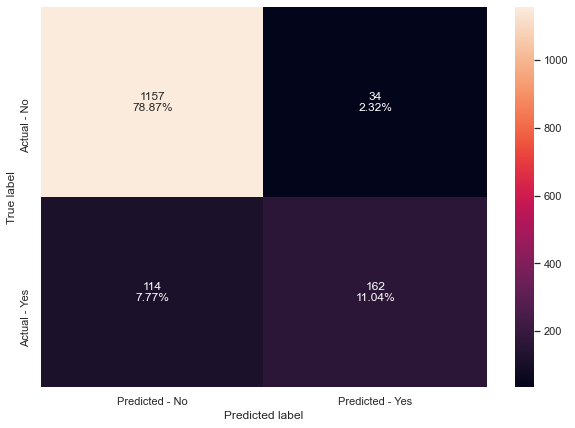

In [150]:
make_confusion_matrix(bagging_estimator,y_test)

In [151]:
tuned_bagging_acc= get_accuracy_score(bagging_estimator)
tuned_bagging_recall = get_recall_score(bagging_estimator)
tuned_bagging_precision = get_precision_score(bagging_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.8991138377641446
Recall on training set :  1.0
Recall on test set :  0.5869565217391305
Precision on training set :  1.0
Precision on test set :  0.826530612244898


## Tune Random Forest

In [152]:
# Code snipet for tuning parameters (if needed)

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
#max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
#bootstrap = [True, False]


In [153]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='precision',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=251, random_state=1)

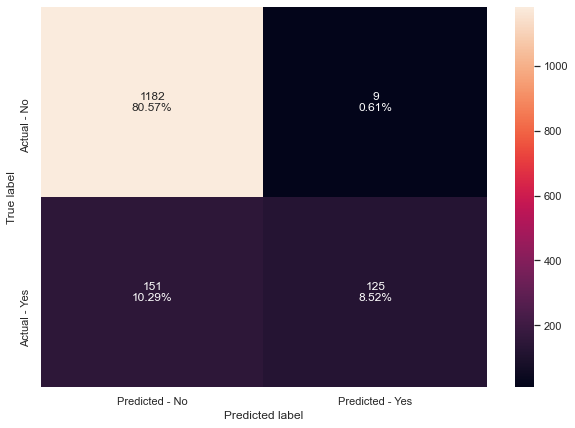

In [154]:
make_confusion_matrix(rf_estimator,y_test)

In [155]:
tuned_rf_acc = get_accuracy_score(rf_estimator)
tuned_rf_recall = get_recall_score(rf_estimator)
tuned_rf_precision = get_precision_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.89093387866394
Recall on training set :  1.0
Recall on test set :  0.4528985507246377
Precision on training set :  1.0
Precision on test set :  0.9328358208955224


In [156]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                              Imp
Age                                      0.130204
MonthlyIncome                            0.128741
DurationOfPitch                          0.099356
Passport                                 0.070114
NumberOfTrips                            0.063996
NumberOfFollowups                        0.057719
NumberOfChildrenVisiting                 0.033038
CityTier_3                               0.028186
PreferredPropertyStar_5.0                0.027569
MaritalStatus_Single                     0.026434
Gender_Male                              0.026177
TypeofContact_Self Enquiry               0.023655
PitchSatisfactionScore_5                 0.022570
OwnCar                                   0.022276
PitchSatisfactionScore_3                 0.021852
PitchSatisfactionScore_4                 0.019532
Occupation_Small Business                0.018916
PreferredPropertyStar_4.0                0.018824
Occupation_Salaried                      0.018601


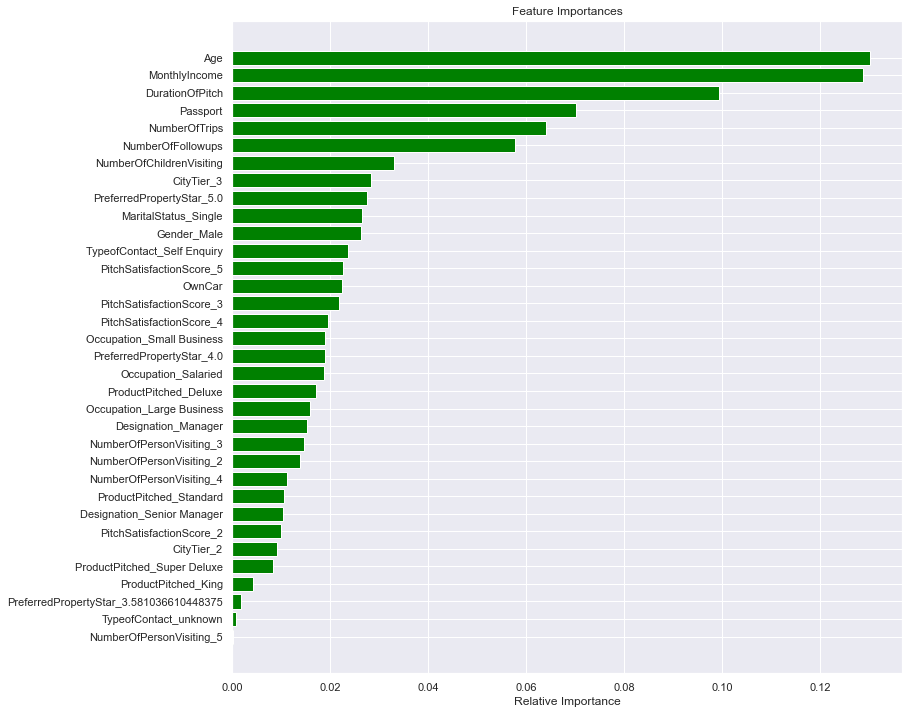

In [157]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Boosting

## AdaBoost Classifier 

In [158]:
ab_classifier=AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

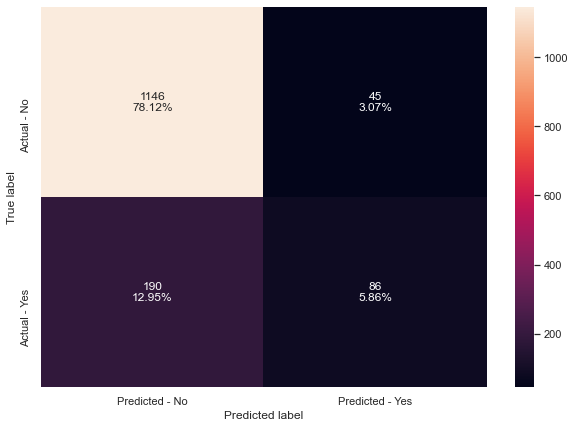

In [159]:
make_confusion_matrix(ab_classifier,y_test)

In [160]:
ab_acc = get_accuracy_score(ab_classifier)
ab_recall = get_recall_score(ab_classifier)
ab_precision = get_precision_score(ab_classifier)

Accuracy on training set :  0.848289973691903
Accuracy on test set :  0.8398091342876619
Recall on training set :  0.3338509316770186
Recall on test set :  0.3115942028985507
Precision on training set :  0.7049180327868853
Precision on test set :  0.6564885496183206


## Tune AdaBoost


In [161]:
# Choose the type of classifier. 
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=90, random_state=1)

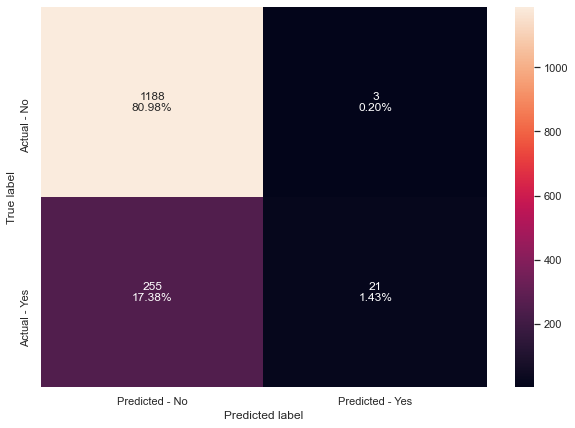

In [162]:
make_confusion_matrix(ab_tuned,y_test)

In [163]:
ab_tuned_acc = get_accuracy_score(ab_tuned)
ab_tuned_recall = get_recall_score(ab_tuned)
ab_tuned_precision = get_precision_score(ab_tuned)

Accuracy on training set :  0.8284127448114587
Accuracy on test set :  0.8241308793456033
Recall on training set :  0.10248447204968944
Recall on test set :  0.07608695652173914
Precision on training set :  0.88
Precision on test set :  0.875


In [207]:
# Choose the type of classifier. 
ab_tuned_2 = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned_2, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned_2 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned_2.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=90, random_state=1)

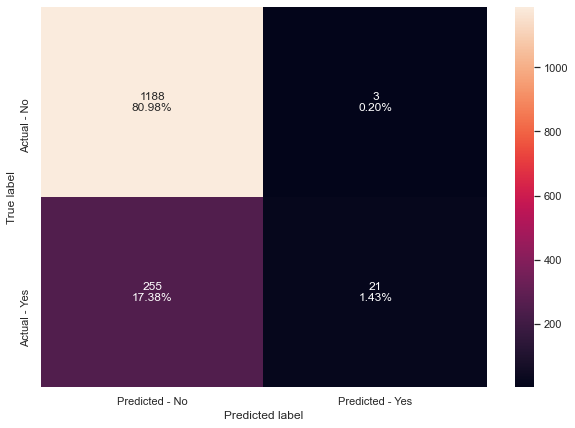

In [208]:
make_confusion_matrix(ab_tuned_2,y_test)

In [209]:
ab_tuned_acc_2 = get_accuracy_score(ab_tuned_2)
ab_tuned_recall_2= get_recall_score(ab_tuned_2)
ab_tuned_precision_2= get_precision_score(ab_tuned_2)

Accuracy on training set :  0.8284127448114587
Accuracy on test set :  0.8241308793456033
Recall on training set :  0.10248447204968944
Recall on test set :  0.07608695652173914
Precision on training set :  0.88
Precision on test set :  0.875


In [218]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(ab_classifier.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                          Imp
Age                                      0.16
MonthlyIncome                            0.16
NumberOfTrips                            0.08
DurationOfPitch                          0.08
NumberOfFollowups                        0.06
CityTier_3                               0.04
ProductPitched_King                      0.04
ProductPitched_Deluxe                    0.04
PreferredPropertyStar_5.0                0.04
ProductPitched_Super Deluxe              0.04
Passport                                 0.04
CityTier_2                               0.02
PreferredPropertyStar_3.581036610448375  0.02
PitchSatisfactionScore_3                 0.02
PitchSatisfactionScore_2                 0.02
Gender_Male                              0.02
MaritalStatus_Single                     0.02
TypeofContact_Self Enquiry               0.02
PitchSatisfactionScore_5                 0.02
PreferredPropertyStar_4.0                0.02
ProductPitched_Standard           

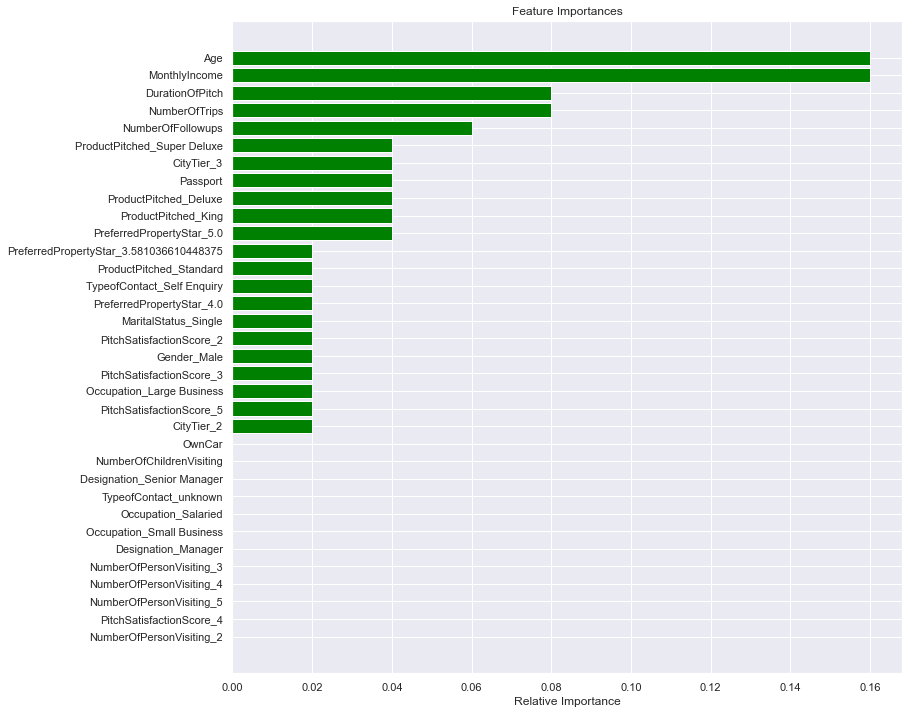

In [220]:
feature_names = X_train.columns
importances = ab_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Gradient Boosting

In [166]:
# first pass modeling

In [167]:
gb_classifier=GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

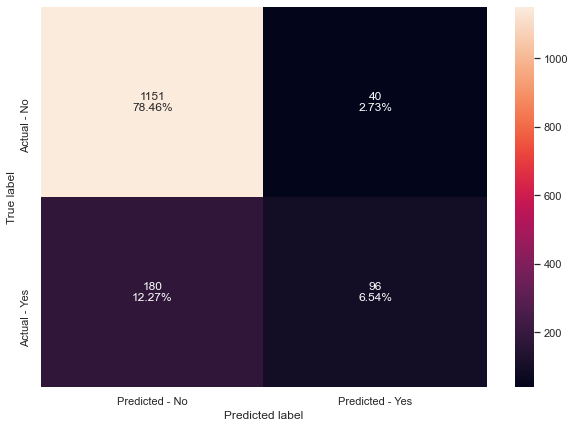

In [168]:
make_confusion_matrix(gb_classifier,y_test)

In [169]:
gb_acc = get_accuracy_score(gb_classifier)
gb_recall = get_recall_score(gb_classifier)
gb_precision = get_precision_score(gb_classifier)

Accuracy on training set :  0.8862905583162818
Accuracy on test set :  0.8500340831629175
Recall on training set :  0.45962732919254656
Recall on test set :  0.34782608695652173
Precision on training set :  0.8783382789317508
Precision on test set :  0.7058823529411765


## Tune Gradient Boosting Classifier

In [170]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, max_features=1, n_estimators=150,
                           random_state=1, subsample=0.9)

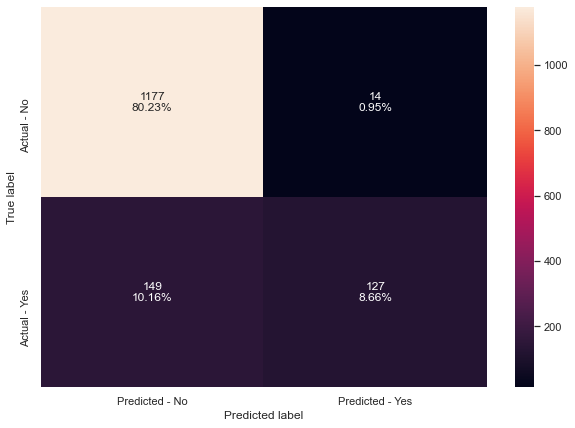

In [171]:
make_confusion_matrix(gb_tuned,y_test)

In [172]:
gb_tuned_acc = get_accuracy_score(gb_tuned)
gb_tuned_recall = get_recall_score(gb_tuned)
gb_tuned_precision = get_precision_score(gb_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.8888888888888888
Recall on training set :  1.0
Recall on test set :  0.4601449275362319
Precision on training set :  1.0
Precision on test set :  0.900709219858156


In [206]:
# Choose the type of classifier. 
gb_tuned_2 = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.5],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,4,5,6]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned_2, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned_2 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned_2.fit(X_train, y_train)



GradientBoostingClassifier(max_features=1, n_estimators=50, random_state=1,
                           subsample=0.5)

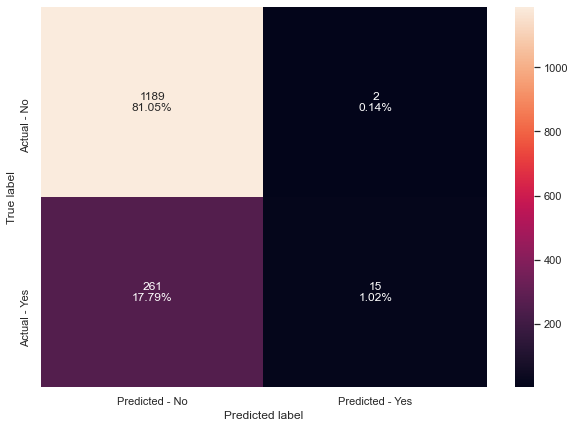

In [210]:
make_confusion_matrix(gb_tuned_2,y_test)

In [211]:
gb_tuned_acc_2 = get_accuracy_score(gb_tuned_2)
gb_tuned_recall_2= get_recall_score(gb_tuned_2)
gb_tuned_precision_2= get_precision_score(gb_tuned_2)

Accuracy on training set :  0.8216895644548378
Accuracy on test set :  0.8207225630538514
Recall on training set :  0.06366459627329192
Recall on test set :  0.05434782608695652
Precision on training set :  0.8541666666666666
Precision on test set :  0.8823529411764706


In [173]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                              Imp
Age                                      0.125589
MonthlyIncome                            0.121567
DurationOfPitch                          0.095940
Passport                                 0.073153
NumberOfTrips                            0.065005
NumberOfFollowups                        0.064000
PreferredPropertyStar_5.0                0.033836
CityTier_3                               0.032202
MaritalStatus_Single                     0.030870
NumberOfChildrenVisiting                 0.028095
Gender_Male                              0.026779
TypeofContact_Self Enquiry               0.024002
ProductPitched_Deluxe                    0.021915
Designation_Manager                      0.021666
OwnCar                                   0.021197
PitchSatisfactionScore_5                 0.020126
Occupation_Salaried                      0.019266
PitchSatisfactionScore_3                 0.018557
Occupation_Small Business                0.018225


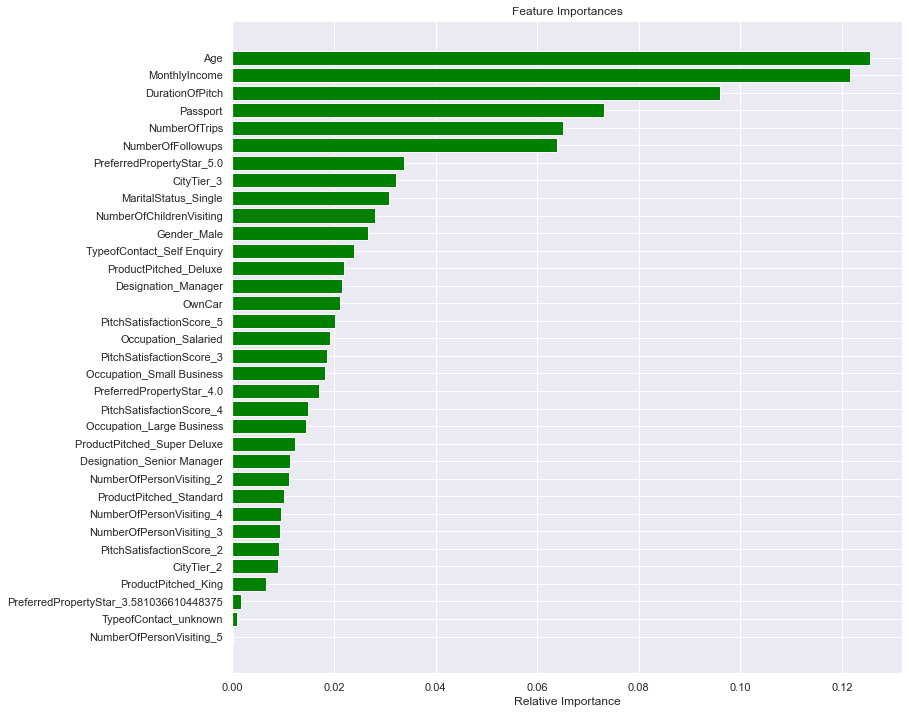

In [174]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## XGBoost

In [175]:
# turn off all the warnings in XGBoost
xgb_classifier=XGBClassifier(verbosity=0, random_state=1)
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

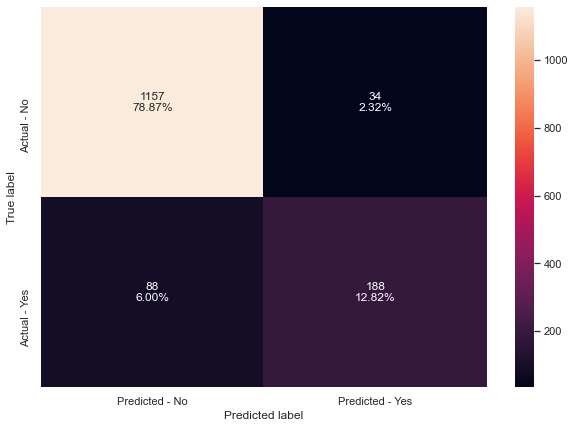

In [176]:
make_confusion_matrix(xgb_classifier,y_test)

In [177]:
xgb_acc = get_accuracy_score(xgb_classifier)
xgb_recall = get_recall_score(xgb_classifier)
xgb_precision = get_precision_score(xgb_classifier)

Accuracy on training set :  1.0
Accuracy on test set :  0.9168370824812543
Recall on training set :  1.0
Recall on test set :  0.6811594202898551
Precision on training set :  1.0
Precision on test set :  0.8468468468468469


## XGBoost Tuned

In [178]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(verbosity = 0, random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              max_features=0.7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=60, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=0)

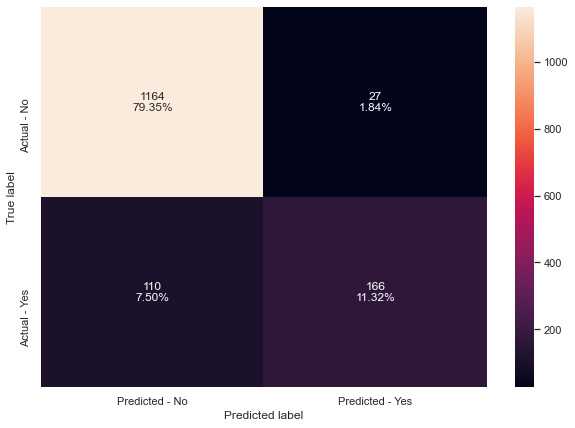

In [179]:
make_confusion_matrix(xgb_tuned,y_test)

In [180]:
xgb_tuned_acc = get_accuracy_score(xgb_tuned)
xgb_tuned_recall = get_recall_score(xgb_tuned)
xgb_tuned_precision = get_precision_score(xgb_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9066121336059987
Recall on training set :  1.0
Recall on test set :  0.6014492753623188
Precision on training set :  1.0
Precision on test set :  0.8601036269430051


* XGBoost tuned on first pass is overfit.  Adding more specifity to Hyperparameters for the 2nd pass.  
* Need to look at the parameters I can toggle to avoid overfitting.
*. 

In [191]:
# Tuning 2nd Pass
# Choose the type of classifier. Adding more parameters from 1p.
xgb_tuned_2p = XGBClassifier(verbosity = 0,random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "learning_rate":[0.1,0.2,0.3,0.4],
    "subsample":[0.5],
    "gamma":[0,0.1, 0.2, 0.3, 0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7],
    "colsample_bylevel":[0.3,0.4,0.5,0.7]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned_2p, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned_2p = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned_2p.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.3,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=0)

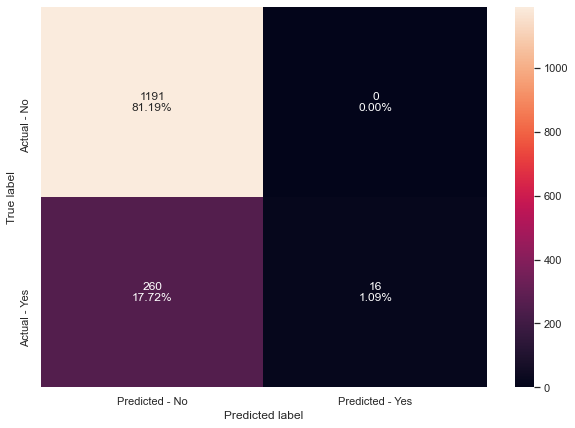

In [192]:
make_confusion_matrix(xgb_tuned_2p,y_test)

In [193]:
xgb_tuned_2p_acc = get_accuracy_score(xgb_tuned_2p)
xgb_tuned_2p_recall = get_recall_score(xgb_tuned_2p)
xgb_tuned_2p_precision = get_precision_score(xgb_tuned_2p)

Accuracy on training set :  0.8292896813797135
Accuracy on test set :  0.8227675528289026
Recall on training set :  0.09472049689440994
Recall on test set :  0.057971014492753624
Precision on training set :  0.9838709677419355
Precision on test set :  1.0


In [199]:
# Tuning 3rd Pass
# Choose the type of classifier. Adjusting scoring metric to recall to see if the model solves better
# recall and precision improves as a consequence.
# Going to make another pass and look at limiting depth to address the overfitting



xgb_tuned_3p = XGBClassifier(verbosity = 0,random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "learning_rate":[0.15,0.20,0.25,0.30],
    "gamma":[0,0.1, 0.2, 0.3, 0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7],
    "colsample_bylevel":[0.3,0.4,0.5,0.7],
    "max_depth":[3,4,5],
    "subsample":[0.5]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned_3p, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned_3p = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned_3p.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=90, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=0)

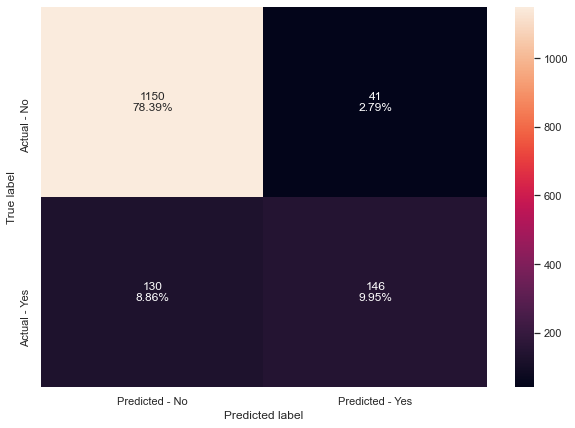

In [200]:
make_confusion_matrix(xgb_tuned_3p,y_test)

In [201]:
xgb_tuned_3p_acc = get_accuracy_score(xgb_tuned_3p)
xgb_tuned_3p_recall = get_recall_score(xgb_tuned_3p)
xgb_tuned_3p_precision = get_precision_score(xgb_tuned_3p)

Accuracy on training set :  0.9757380882782812
Accuracy on test set :  0.8834355828220859
Recall on training set :  0.8975155279503105
Recall on test set :  0.5289855072463768
Precision on training set :  0.9714285714285714
Precision on test set :  0.7807486631016043


In [202]:
# Tuning 4th Pass
# Choose the type of classifier. Adjusting scoring metric back to PRECISION SCORING to see 
# Going to make another pass and look at limiting depth to address the overfitting



xgb_tuned_4p = XGBClassifier(verbosity = 0,random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "learning_rate":[0.15,0.20,0.25,0.30],
    "gamma":[0,0.1, 0.2, 0.3, 0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7],
    "colsample_bylevel":[0.3,0.4,0.5,0.7],
    "max_depth":[3,4,5],
    "subsample":[0.5]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned_4p, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned_4p = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned_4p.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.3,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=0)

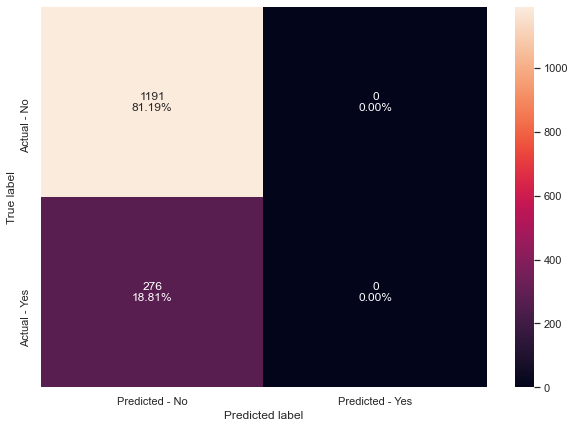

In [205]:
make_confusion_matrix(xgb_tuned_4p,y_test)

In [223]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                              Imp
Passport                                 0.081374
ProductPitched_Deluxe                    0.063620
Occupation_Large Business                0.044233
CityTier_3                               0.041697
ProductPitched_Super Deluxe              0.041494
MaritalStatus_Single                     0.039665
PreferredPropertyStar_4.0                0.039559
PitchSatisfactionScore_2                 0.038271
PitchSatisfactionScore_5                 0.038260
NumberOfFollowups                        0.036238
PreferredPropertyStar_5.0                0.035858
Age                                      0.033757
DurationOfPitch                          0.033375
CityTier_2                               0.033120
PitchSatisfactionScore_4                 0.032983
MonthlyIncome                            0.031923
ProductPitched_King                      0.030088
NumberOfPersonVisiting_2                 0.030034
NumberOfTrips                            0.029000


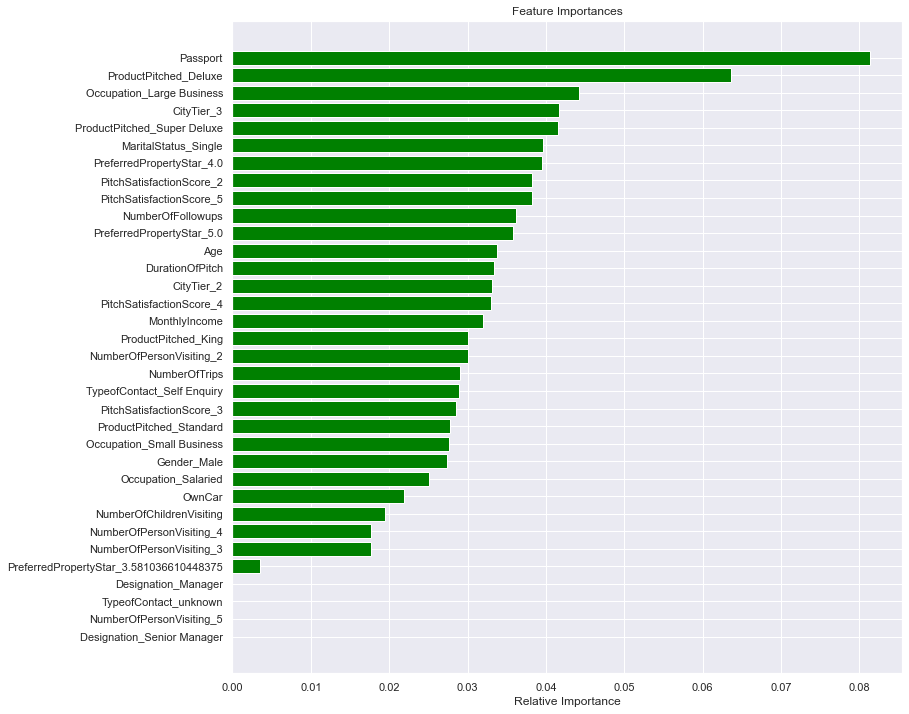

In [224]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Stacking Models

In [235]:
estimators=[('Decision Tree', dtree_estimator),('Random Forest', rf_estimator),
           ('Gradient Boosting', gb_tuned_2), ('AdaBoost', ab_tuned_2)]
final_estimator=XGBClassifier (random_state=1)

In [236]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.8118,
                                                                     1: 0.1882},
                                                       max_depth=3,
                                                       max_leaf_nodes=5,
                                                       min_impurity_decrease=0.0001,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features='log2',
                                                       n_estimators=251,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(max_features=1,
                                                           n_estima

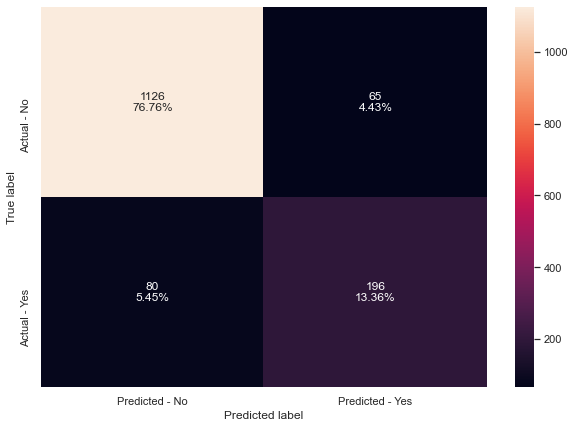

In [239]:
make_confusion_matrix(stacking_estimator,y_test)

In [237]:
stacking_acc = get_accuracy_score(stacking_estimator)
stacking_recall = get_recall_score(stacking_estimator)
stacking_precision = get_precision_score(stacking_estimator)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9011588275391956
Recall on training set :  1.0
Recall on test set :  0.7101449275362319
Precision on training set :  0.9984496124031008
Precision on test set :  0.7509578544061303


# <a id = "link6"></a> 6. Compare all models and evaluate

In [240]:
# defining list of models
models = [dtree,dtree_estimator,bagging,bagging_wt,bagging_estimator,rf,rf_wt,rf_estimator
          ,ab_classifier,ab_tuned,ab_tuned_2,gb_classifier,gb_tuned, gb_tuned_2,xgb_classifier, xgb_tuned, xgb_tuned_2p, xgb_tuned_3p
         , xgb_tuned_4p, stacking_estimator]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [241]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier',
                                          'Weighted Bagging Classifier','Tuned Bagging Classifier',
                                          'Random Forest','Weighted Random Forest','Tuned Random Forest'
                                         ,'AdaBoost Classifier', 'Tuned AdaBoost', 'Tuned AdaBoost_2'
                                         ,'Gradient Boosting Classifier', 'Tuned GBC' 
                                         ,'Tuned GBC 2nd pass','XGBoost Classifier', 'Tuned XGBoost'
                                         , '2nd Pass - Tuned XGBoost', '3rd pass - Tuned XGBoost'
                                         , '4th Pass - Tuned XGBoost','Stacking'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.000000,0.847989,1.000000,0.641304,1.000000,0.588040
1,Tuned Decision Tree,0.817890,0.815269,0.032609,0.025362,1.000000,0.777778
2,Bagging Classifier,0.993569,0.882754,0.965839,0.496377,1.000000,0.805882
3,Weighted Bagging Classifier,0.994154,0.879346,0.972050,0.521739,0.996815,0.761905
4,Tuned Bagging Classifier,1.000000,0.899114,1.000000,0.586957,1.000000,0.826531
5,Random Forest,1.000000,0.891616,1.000000,0.456522,1.000000,0.933333
6,Weighted Random Forest,1.000000,0.891616,1.000000,0.489130,1.000000,0.882353
7,Tuned Random Forest,1.000000,0.890934,1.000000,0.452899,1.000000,0.932836
8,AdaBoost Classifier,0.848290,0.839809,0.333851,0.311594,0.704918,0.656489
9,Tuned AdaBoost,0.828413,0.824131,0.102484,0.076087,0.880000,0.875000


## Observations

Each of the models are overfitting the training data sets.  In spite of the attempts to adjust factors in hyperparameter tuning which contribute to overfitting, the model performance for maximizing precision and predicting True Positives remain poor.

* Specifically, I modulated :

Learning Rate
Max_Depth
Subsample

I also toggled scoring from Precision to Recall with little success.  

With more experimentation to really go deep into each Model type and how each of the Hyperparameters affect the model’s ability to perform on unseen data, it is possible that the overfitting could be reduced. Based on the tuning work done, it is possible that reducing the depth will be the best solution, however Precision could remain poor on unseen data.

One key challenge is the compute time for each of the boosting model tuning.  The more the model is constrained, the more intense the compute time becomes and time to explore. 

* The Best Model so far based on the least overfitting behavior balanced with the highest TP% and Precision for test data is:

Gradient Boosting Classifier Tuned demonstrating at 85% precision on Training data and 88% precision on Testing Data.  The model predicts a 8.66% True Positives (TP) on Unseen Data.



## Feature Importance for GBC Tuned 

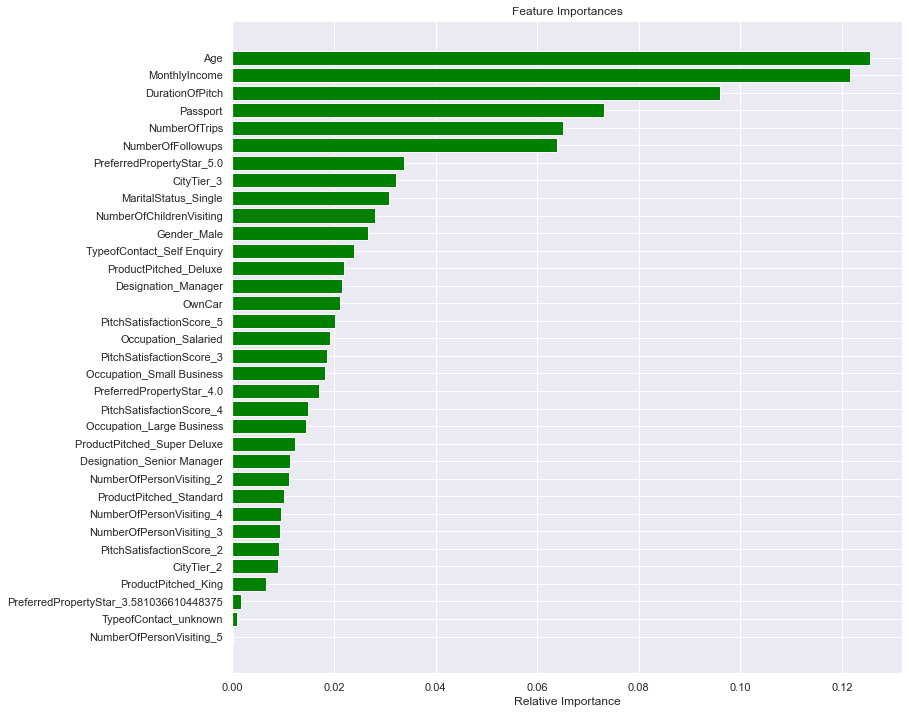

In [242]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [243]:
print (pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                              Imp
Age                                      0.125589
MonthlyIncome                            0.121567
DurationOfPitch                          0.095940
Passport                                 0.073153
NumberOfTrips                            0.065005
NumberOfFollowups                        0.064000
PreferredPropertyStar_5.0                0.033836
CityTier_3                               0.032202
MaritalStatus_Single                     0.030870
NumberOfChildrenVisiting                 0.028095
Gender_Male                              0.026779
TypeofContact_Self Enquiry               0.024002
ProductPitched_Deluxe                    0.021915
Designation_Manager                      0.021666
OwnCar                                   0.021197
PitchSatisfactionScore_5                 0.020126
Occupation_Salaried                      0.019266
PitchSatisfactionScore_3                 0.018557
Occupation_Small Business                0.018225


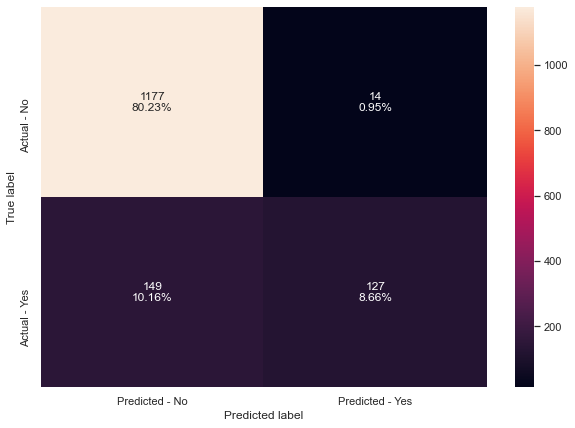

In [246]:
make_confusion_matrix(gb_tuned,y_test)

In [245]:
gb_tuned_acc = get_accuracy_score(gb_tuned_2)
gb_tuned_recall = get_recall_score(gb_tuned_2)
gb_tuned_precision = get_precision_score(gb_tuned_2)

Accuracy on training set :  0.8216895644548378
Accuracy on test set :  0.8207225630538514
Recall on training set :  0.06366459627329192
Recall on test set :  0.05434782608695652
Precision on training set :  0.8541666666666666
Precision on test set :  0.8823529411764706


# <a id = "link7"></a> 7.  Summary and Conclusions

### Key Takeaways & Recommendations to Grow the Business


Applied to unseen data, this model predicts that 8.66% of Customers will buy a Travel Package (attach rate) with a Precision of 88%. 

The model with the least overfitting tendencies, highest precision, and highest True Positives performance was the Gradient Boost Classifier Tuned model.  Model parameters :  max_depth = 10, max_features = 1, n_estimators =150, using a subsample setting = 0.9.

The most important features are Age and Monthly Income (25% importance combined, equally split).  The average customer age will be ~38 years old and 50% of these customers will be between 31-44 years old.  They will come from an income range of 20,346 to 25,571 USD per month, and on average 283,438 USD per annum.

The model then predicts the next most important influencer will be the duration of pitch (9.5%) the customer received.  Over half the customers will sit through a pitch between 9 and 20 minutes.  

Passport is the next most important factor at 7.3%.  71% of Customers will not have a Passport.  

The number of trips a customer takes each year will influence the model by 6.5%.  The average number of trips per year for customers will be about 3.5.  The number of follow ups after the initial sales pitch has the same importance to the model.  Customers who buy a Travel Pacakage receive 3.7 followups after the Sales Pitch. 

These features combined (6 features) represent 54% of feature importance.

The remaining 28 features represent the balance of 26% importance and range in influence from 3.3% down to effectively 0% (no importance).  Each of these can be mapped to their typical attributes for more resolution to inform sales and marketing efforts to improve attach rate.











